https://github.com/Skylark0924/Machine-Learning-is-ALL-You-Need


In [33]:
!pip install tensorflow

In [0]:
import tensorflow

In [0]:
import math 
import numpy as np
import torch

class l1_regularization():
    def __init__(self, alpha):
        self.alpha = alpha
 
    # L1正则化的方差
    def __call__(self, w):
        loss = np.sum(np.fabs(w))
        return self.alpha * loss
 
    # L1正则化的梯度
    def grad(self, w):
        return self.alpha * np.sign(w)

class l2_regularization():
    def __init__(self, alpha):
        self.alpha = alpha
 
    # L2正则化的方差
    def __call__(self, w):
        loss = w.T.dot(w)
        return self.alpha * 0.5 * float(loss)
 
    # L2正则化的梯度
    def grad(self, w):
        return self.alpha * w

def calculate_entropy(y):
    """ Calculate the entropy of label array y """
    log2 = lambda x: math.log(x) / math.log(2)
    unique_labels = np.unique(y)
    entropy = 0
    for label in unique_labels:
        count = len(y[y == label])
        p = count / len(y)
        entropy += -p * log2(p)
    return entropy

def calculate_variance(X):
    """ Return the variance of the features in dataset X """
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))
    
    return variance

def divide_on_feature(X, feature_i, threshold):
    """ Divide dataset based on if sample value on feature index is larger than
        the given threshold """
    split_func = None
    if isinstance(threshold, int) or isinstance(threshold, float):
        split_func = lambda sample: sample[feature_i] >= threshold
    else:
        split_func = lambda sample: sample[feature_i] == threshold

    X_1 = np.array([sample for sample in X if split_func(sample)])
    X_2 = np.array([sample for sample in X if not split_func(sample)])

    return np.array([X_1, X_2])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

def relu(z):
    return np.maximum(z, 0)

def relu_derivative(z):
    return np.maximum(z, 0)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1-(z**2)

#softmax activation
def softmax(X):
    exp_X = np.exp(X)
    exp_X_sum = np.sum(exp_X,axis=1).reshape(-1,1)
    exp_X = exp_X/exp_X_sum
    return exp_X

def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1.-epsilon)
    N = predictions.shape[0]
    ce = - np.sum(targets*np.log(predictions)) / N
    return ce

class LeastSquaresLoss():
    """Least squares loss"""

    def gradient(self, actual, predicted):
        return actual - predicted

    def hess(self, actual, predicted):
        return np.ones_like(actual)

class Loss(object):
    def loss(self, y_true, y_pred):
        return NotImplementedError()

    def gradient(self, y, y_pred):
        raise NotImplementedError()

    def acc(self, y, y_pred):
        return 0

class SquareLoss(Loss):
    def __init__(self): pass

    def loss(self, y, y_pred):
        return 0.5 * np.power((y - y_pred), 2)

    def gradient(self, y, y_pred):
        return -(y - y_pred)

class CrossEntropy(Loss):
    def __init__(self): pass

    def loss(self, y, p):
        # Avoid division by zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - y * np.log(p) - (1 - y) * np.log(1 - p)

    def acc(self, y, p):
        return accuracy_score(np.argmax(y, axis=1), np.argmax(p, axis=1))

    def gradient(self, y, p):
        # Avoid division by zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - (y / p) + (1 - y) / (1 - p)


class SotfMaxLoss(Loss):
    def gradient(self, y, p):
        return y - p

def accuracy_score(y_true, y_pred):
    """ Compare y_true to y_pred and return the accuracy """
    accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
    return 

def to_categorical(x, n_col=None):
    """ One-hot encoding of nominal values """
    if not n_col:
        n_col = np.amax(x) + 1
    one_hot = np.zeros((x.shape[0], n_col))
    one_hot[np.arange(x.shape[0]), x] = 1
    return one_hot

# ------------------- TRPO -----------------------------
def normal_entropy(std):
    var = std.pow(2)
    entropy = 0.5 + 0.5 * torch.log(2 * var * math.pi)
    return entropy.sum(1, keepdim=True)


def normal_log_density(x, mean, log_std, std):
    var = std.pow(2)
    log_density = -(x - mean).pow(2) / (
        2 * var) - 0.5 * math.log(2 * math.pi) - log_std
    return log_density.sum(1, keepdim=True)


def get_flat_params_from(model):
    params = []
    for param in model.parameters():
        params.append(param.data.view(-1))

    flat_params = torch.cat(params)
    return flat_params


def set_flat_params_to(model, flat_params):
    prev_ind = 0
    for param in model.parameters():
        flat_size = int(np.prod(list(param.size())))
        param.data.copy_(
            flat_params[prev_ind:prev_ind + flat_size].view(param.size()))
        prev_ind += flat_size


def get_flat_grad_from(net, grad_grad=False):
    grads = []
    for param in net.parameters():
        if grad_grad:
            grads.append(param.grad.grad.view(-1))
        else:
            grads.append(param.grad.view(-1))

    flat_grad = torch.cat(grads)
    return flat_grad

In [0]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from sklearn.metrics import confusion_matrix

import progressbar

bar_widgets = [
    'Training: ', progressbar.Percentage(), ' ', progressbar.Bar(marker="-", left="[", right="]"),
    ' ', progressbar.ETA()
]


def visualization_clf(X_train, Y_train, classifier, clf_name, set_name):
    X_set, y_set = X_train, Y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title('{} ({} set)'.format(clf_name, set_name))
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

def visualization_reg(X, Y, regressor, reg_name, set_name):
    plt.scatter(X, Y, color='red')
    plt.plot(X, regressor.predict(X), color='blue')
    plt.title('{} ({} set)'.format(reg_name, set_name))
    plt.show()

def print_confusion_matrix(Y_test, Y_pred, clf_name):
    cm = confusion_matrix(Y_test, Y_pred)
    print('{}:\n'.format(clf_name), cm)


def print_mse(Y_test, Y_pred, reg_name):
    mse = mean_squared_error(Y_test, Y_pred)
    print("Mean Squared Error for {}:".format(reg_name), mse)


def mean_squared_error(y_true, y_pred):
    """ Returns the mean squared error between y_true and y_pred """
    mse = np.mean(np.power(y_true - y_pred, 2))
    return mse


# 可视化二维数据
def plot_data_2d(X,marker):
    plt.plot(X[:,0],X[:,1],marker) 
    return plt

# 显示图片
def display_imageData(imgData):
    sum = 0
    '''
    显示100个数（若是一个一个绘制将会非常慢，可以将要画的图片整理好，放到一个矩阵中，显示这个矩阵即可）
    - 初始化一个二维数组
    - 将每行的数据调整成图像的矩阵，放进二维数组
    - 显示即可
    '''
    m,n = imgData.shape
    width = np.int32(np.round(np.sqrt(n)))
    height = np.int32(n/width);
    rows_count = np.int32(np.floor(np.sqrt(m)))
    cols_count = np.int32(np.ceil(m/rows_count))
    pad = 1
    display_array = -np.ones((pad+rows_count*(height+pad),pad+cols_count*(width+pad)))
    for i in range(rows_count):
        for j in range(cols_count):
            max_val = np.max(np.abs(imgData[sum,:]))
            display_array[pad+i*(height+pad):pad+i*(height+pad)+height,pad+j*(width+pad):pad+j*(width+pad)+width] = imgData[sum,:].reshape(height,width,order="F")/max_val    # order=F指定以列优先，在matlab中是这样的，python中需要指定，默认以行
            sum += 1
            
    plt.imshow(display_array,cmap='gray')   #显示灰度图像
    plt.axis('off')
    plt.show()

def kmeans_plot(X, centroids):
    plt.scatter(X[:,0], X[:,1])     # 原数据的散点图
    plt.plot(centroids[:,0],centroids[:,1],'r^',markersize=10)  # 聚类中心
    plt.show()

Logistic Regression:
 [[67  1]
 [13 19]]


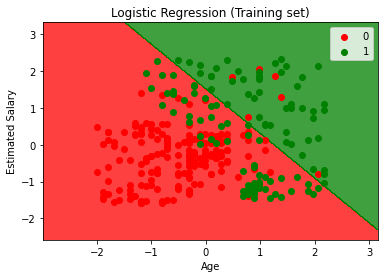

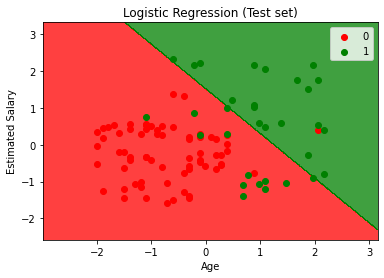

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("D:\Github\Machine-Learning-Basic-Codes")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


class Skylark_LogisticRegression():
    def __init__(self, learning_rate=0.1, epoch=500):
        super().__init__()
        self.learning_rate = learning_rate
        self.epoch = epoch

        self.init_theta = None  
        self.final_theta = None

    def initialize_weights(self, n_features):
        # 初始化参数
        # 参数范围[-1/sqrt(N), 1/sqrt(N)]
        limit = np.sqrt(1 / n_features)
        w = np.random.uniform(-limit, limit, (n_features, 1))
        b = 0
        self.init_theta = np.insert(w, 0, b, axis=0)

    def fit(self, X, y):
        m_samples, n_features = X.shape
        self.initialize_weights(n_features)
        # 为X增加一列特征x1，x1 = 0
        X = np.insert(X, 0, 1, axis=1)
        y = np.reshape(y, (m_samples, 1))

        # 梯度训练n_iterations轮
        for i in range(self.epoch):
            h_x = X.dot(self.init_theta)
            y_pred = sigmoid(h_x)
            theta_grad = X.T.dot(y_pred - y)
            self.init_theta -= self.learning_rate * theta_grad
        self.final_theta = self.init_theta

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        h_x = X.dot(self.final_theta)
        y_pred = np.round(sigmoid(h_x))
        return y_pred.astype(int)

    def cost(self, theta, X, y):
        ''' cost fn is -l(theta) for you to minimize'''
        return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

    def gradient(self, theta, X, y):
        '''just 1 batch gradient'''
        return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)


if __name__ == '__main__':
    use_sklearn = False

    dataset = pd.read_csv('Social_Network_Ads.csv')
    X = dataset.iloc[:, [2, 3]].values
    Y = dataset.iloc[:, 4].values

    # Making Dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.25, random_state=0)

    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train.astype(np.float64))
    X_test = sc.transform(X_test.astype(np.float64))

    if use_sklearn:
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(solver='lbfgs')
        classifier.fit(X_train, Y_train)
    else:
        classifier = Skylark_LogisticRegression()
        classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    print_confusion_matrix(
        Y_test, Y_pred, clf_name='Logistic Regression')

    # Visualising the Training set results
    visualization_clf(X_train, Y_train, classifier,
                      clf_name='Logistic Regression', set_name='Training')
    # Visualising the Test set results
    visualization_clf(X_test, Y_test, classifier,
                      clf_name='Logistic Regression', set_name='Test')

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sys 
sys.path.append("D:\Github\Machine-Learning-Basic-Codes") 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


class Skylark_KNeighborsClassifier():
    def __init__(self, k_neighbors):
        super().__init__()
        self.k_neighbors = k_neighbors

    def predict(self, X_test, X_train, y_train):
        y_predict = np.zeros(X_test.shape[0])
        for i in range(X_test.shape[0]):
            distances = np.zeros((X_train.shape[0], 2))  # 测试的数据和训练的各个数据的欧式距离
            for j in range(X_train.shape[0]):
                dis = self.euclidean_distance(X_test[i], X_train[j])  # 计算欧式距离
                label = y_train[j]  # 测试集到的每个训练集的数据的分类标签
                distances[j] = [dis, label]

                # argsort()得到测试集到训练的各个数据的欧式距离从小到大排列并且得到序列，然后再取前k个.
                k_nearest_neighbors = distances[distances[:, 0].argsort(
                )][:self.k_neighbors]

                # 利用np.bincount统计k个近邻里面各类别出现的次数
                counts = np.bincount(k_nearest_neighbors[:, 1].astype('int'))

                # 得出每个测试数据k个近邻里面各类别出现的次数最多的类别
                testLabel = counts.argmax()
                y_predict[i] = testLabel

        return np.array(y_predict)

    def euclidean_distance(self, x1, x2):
        """ Calculates the l2 distance between two vectors """
        distance = 0
        # Squared distance between each coordinate
        for i in range(len(x1)):
            distance += pow((x1[i] - x2[i]), 2)
        return math.sqrt(distance)


if __name__ == '__main__':
    use_sklearn = False

    # Data Preprocessing
    dataset = pd.read_csv('Social_Network_Ads.csv')
    X = dataset.iloc[:, [2, 3]].values
    Y = dataset.iloc[:, 4].values

    # Making Dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.25, random_state=0)

    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train.astype(np.float64))
    X_test = sc.transform(X_test.astype(np.float64))

    if use_sklearn:
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(
            n_neighbors=5, metric='minkowski', p=2)
        classifier.fit(X_train, Y_train)
        Y_pred = classifier.predict(X_test)
    else:
        classifier = Skylark_KNeighborsClassifier(
            k_neighbors=5
        )
        Y_pred = classifier.predict(X_test, X_train, Y_train)

    # Y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    print_confusion_matrix(Y_test, Y_test, clf_name='KNN')

    # Visualization TODO
    # visualization_clf(X_train, Y_train, classifier, clf_name='KNN', set_name='Training')
    # visualization_clf(X_test, Y_test, classifier, clf_name='KNN', set_name='Test')


KNN:
 [[68  0]
 [ 0 32]]


In [0]:
import numpy as np
import scipy.spatial.distance as dist


#线性核函数
class LinearKernel(object):
    def __call__(self, x, y):
        return np.dot(x, y.T)


#多项式核函数
class PolyKernel(object):
    #初始化方法
    def __init__(self, degree=2):
        self.degree = degree

    def __call__(self, x, y):
        return np.dot(x, y.T) ** self.degree

#高斯核函数
class RBF(object):
    def __init__(self, gamma=0.1):
        self.gamma = gamma

    def __call__(self, x, y):
        x = np.atleast_2d(x)
        y = np.atleast_2d(y)
        return np.exp(-self.gamma * dist.cdist(x, y) ** 2).flatten()

SVM:
 [[ 0  0  0]
 [67  0  1]
 [10  0 22]]


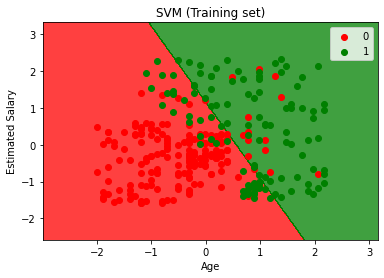

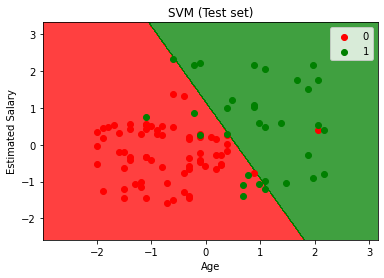

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys 
sys.path.append("D:\Github\Machine-Learning-Basic-Codes") 
# import progressbar

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




class Skylark_SVC():
    def __init__(self, C=1, kernel=None, epsilon=1e-3, epoch=600):
        super().__init__()
        self.C = C  # 正则化的参数
        self.kernel = kernel
        self.epsilon = epsilon  # 用来判断是否收敛的阈值
        self.epoch = epoch  # 迭代次数的最大值
        self.b = 0  # 偏置值
        self.alpha = None  # 拉格朗日乘子
        self.final_alpha = None  # 拉格朗日乘子结果
        self.K = None  # 特征经过核函数转化的值

    def fit(self, X_train, Y_train):
        self.kernel_process(X_train, Y_train, self.kernel)

        for now_iter in range(self.epoch):
            alpha_prev = np.copy(self.alpha)
            for j in range(self.m):

                # 选择第二个优化的拉格朗日乘子
                i = self.random_index(j)
                error_i, error_j = self.error_row(i, alpha_prev), self.error_row(j, alpha_prev)

                # 检验他们是否满足KKT条件，然后选择违反KKT条件最严重的self.alpha[j]
                if (self.Y[j] * error_j < -0.001 and self.alpha[j] < self.C) or (self.Y[j] * error_j > 0.001 and self.alpha[j] > 0):

                    eta = 2.0 * self.K[i, j] - self.K[i, i] - \
                        self.K[j, j]  # 第j个要优化的拉格朗日乘子，最后需要的

                    if eta >= 0:
                        continue

                    L, H = self.getBounds(i, j)
                    # 旧的拉格朗日乘子的值
                    old_alpha_j, old_alpha_i = self.alpha[j], self.alpha[i]
                    # self.alpha[j]的更新
                    self.alpha[j] -= (self.Y[j] * (error_i - error_j)) / eta

                    # 根据约束最后更新拉格朗日乘子self.alpha[j]，并且更新self.alpha[j]
                    self.alpha[j] = self.finalValue(self.alpha[j], H, L)
                    self.alpha[i] = self.alpha[i] + self.Y[i] * \
                        self.Y[j] * (old_alpha_j - self.alpha[j])

                    # 更新偏置值b
                    b1 = self.b - error_i - self.Y[i] * (self.alpha[i] - old_alpha_j) * self.K[i, i] - \
                        self.Y[j] * (self.alpha[j] -
                                     old_alpha_j) * self.K[i, j]
                    b2 = self.b - error_j - self.Y[j] * (self.alpha[j] - old_alpha_j) * self.K[j, j] - \
                        self.Y[i] * (self.alpha[i] -
                                     old_alpha_i) * self.K[i, j]
                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = 0.5 * (b1 + b2)

            # 判断是否收敛(终止)
            diff = np.linalg.norm(self.alpha - alpha_prev)
            if diff < self.epsilon:
                self.final_alpha = np.copy(self.alpha)
                break

        self.final_alpha = np.copy(self.alpha)

    def predict(self, X):
        n = X.shape[0]
        result = np.zeros(n)
        for i in range(n):
            result[i] = np.sign(self.predict_row(X[i, :], self.final_alpha))  # 正的返回1，负的返回-1
        return result

    # 用带拉格朗日乘子表示的w代入wx+b
    def predict_row(self, X, alpha):
        k_v = self.kernel(self.X, X)
        return np.dot((alpha * self.Y).T, k_v.T) + self.b

    def kernel_process(self, X_train, Y_train, kernel):
        self.X = X_train
        self.Y = Y_train
        self.m = X_train.shape[0]
        self.n = X_train.shape[1]
        self.K = np.zeros((self.m, self.m))  # 核的新特征数组初始化
        self.alpha = np.zeros(self.m)  # 拉格朗日乘子初始化
        # self.bar = progressbar.ProgressBar(widgets=bar_widgets)  # 进度条
        if kernel == None:
            self.kernel = LinearKernel()  # 无核默认是线性的核
        else:
            self.kernel = kernel
        for i in range(self.m):
            self.K[:, i] = self.kernel(
                self.X, self.X[i, :])  # 每一行数据的特征通过核函数转化 n->m

    # 随机一个要优化的拉格朗日乘子，该乘子必须和循环里面选择的乘子不同
    def random_index(self, first_alpha):
        i = first_alpha
        while i == first_alpha:
            i = np.random.randint(0, self.m - 1)
        return i

    # 预测的值减真实的Y
    def error_row(self, i, alpha):
        return self.predict_row(self.X[i], alpha) - self.Y[i]

    # 得到self.alpha[j]的范围约束
    def getBounds(self, i, j):
        if self.Y[i] != self.Y[j]:
            L = max(0, self.alpha[j] - self.alpha[i])
            H = min(self.C, self.C - self.alpha[i] + self.alpha[j])
        else:
            L = max(0, self.alpha[i] + self.alpha[j] - self.C)
            H = min(self.C, self.alpha[i] + self.alpha[j])
        return L, H

    # 根据self.alpha[i]的范围约束获得最终的值
    def finalValue(self, alpha, H, L):
        if alpha > H:
            alpha = H
        elif alpha < L:
            alpha = L
        return alpha


if __name__ == '__main__':
    use_sklearn = False

    # Data Preprocessing
    dataset = pd.read_csv('Social_Network_Ads.csv')
    X_data = dataset.iloc[:, [2, 3]].values
    Y_data = dataset.iloc[:, 4].values

    # Making Dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X_data, Y_data, test_size=0.25, random_state=0)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train.astype(np.float64))
    X_test = sc.transform(X_test.astype(np.float64)) 

    if use_sklearn:
        from sklearn.svm import SVC
        classifier = SVC(kernel='linear', random_state=0)
        classifier.fit(X_train, Y_train)
    else:
        classifier = Skylark_SVC()
        classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    # Confusion matrix
    print_confusion_matrix(Y_test, Y_pred, clf_name='SVM')

    # Visualization
    visualization_clf(X_train, Y_train, classifier, clf_name='SVM', set_name='Training')

    visualization_clf(X_test, Y_test, classifier, clf_name='SVM', set_name='Test')

Naive Bayes Classification:
 [[65  3]
 [ 7 25]]


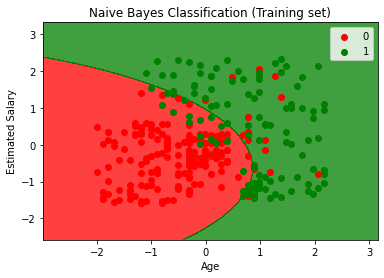

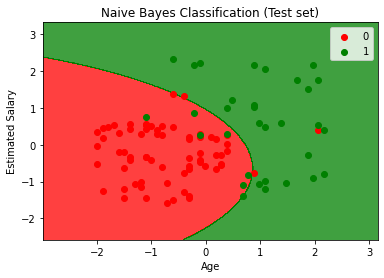

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("D:\Github\Machine-Learning-Basic-Codes")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class Skylark_Naive_Bayes():
    def __init__(self):
        super().__init__()

    def fit(self, X_train, Y_train):
        self.X = X_train
        self.y = Y_train
        self.classes = np.unique(Y_train) # 从label中找出不同的类别
        self.parameters = {}
        for i, c in enumerate(self.classes):
            # 计算每个种类的平均值，方差，先验概率
            X_Index_c = self.X[np.where(Y_train == c)]
            X_index_c_mean = np.mean(X_Index_c, axis=0, keepdims=True)
            X_index_c_var = np.var(X_Index_c, axis=0, keepdims=True)
            parameters = {"mean": X_index_c_mean, "var": X_index_c_var, "prior": X_Index_c.shape[0] / self.X.shape[0]}
            self.parameters["class" + str(c)] = parameters

    def predict(self, X_test):
        # 取概率最大的类别返回预测值
        # P(A|B)=P(A)*P(B|A)/P(B)
        # the class is max[P(A|B), P($\bar{A}$|B)]
        output = self._predict(X_test)
        output = np.reshape(output, (self.classes.shape[0], X_test.shape[0]))
        prediction = np.argmax(output, axis=0)
        return prediction

    def _predict(self, X_test):
        # 计算每个种类的概率P(Y|x1,x2,x3) =  P(Y)*P(x1|Y)*P(x2|Y)*P(x3|Y)
        output = []
        for y in range(self.classes.shape[0]):
            prior = np.log(self.parameters["class" + str(y)]["prior"]) # log[P(A)]
            posterior = self._pdf(X_test, y)
            prediction = prior + posterior # log[P(A) * P(B|A) /P(B)]=log[P(A)] + log[P(B|A) /P(B)]
            output.append(prediction)
        return output

    def _pdf(self, _X, classes): # log[P(B|A) /P(B)]
        # 一维高斯分布的概率密度函数
        # eps为防止分母为0
        eps = 1e-4
        mean = self.parameters["class" + str(classes)]["mean"]
        var = self.parameters["class" + str(classes)]["var"]

        # 取对数防止数值溢出
        # numerator.shape = [m_sample,feature]
        numerator = np.exp(-(_X - mean) ** 2 / (2 * var + eps))
        denominator = np.sqrt(2 * np.pi * var + eps)

        # 朴素贝叶斯假设(每个特征之间相互独立)
        # P(x1,x2,x3|Y) = P(x1|Y)*P(x2|Y)*P(x3|Y),取对数相乘变为相加
        # result.shape = [m_sample,1]
        result = np.sum(np.log(numerator / denominator), axis=1, keepdims=True)
        return result.T


if __name__ == '__main__':
    use_sklearn = False

    # Data Preprocessing
    dataset = pd.read_csv('Social_Network_Ads.csv')
    X = dataset.iloc[:, [2, 3]].values
    Y = dataset.iloc[:, 4].values

    # Making Dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.25, random_state=0)

    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train.astype(np.float64))
    X_test = sc.transform(X_test.astype(np.float64))

    if use_sklearn:
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB(priors=None, var_smoothing=1e-09)
        classifier.fit(X_train, Y_train)
    else:
        classifier = Skylark_Naive_Bayes()
        classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    print_confusion_matrix(
        Y_test, Y_pred, clf_name='Naive Bayes Classification')

    # Visualising the Training set results
    visualization_clf(X_train, Y_train, classifier,
                  clf_name='Naive Bayes Classification', set_name='Training')
    # Visualising the Test set results
    visualization_clf(X_test, Y_test, classifier,
                  clf_name='Naive Bayes Classification', set_name='Test')

In [0]:
import numpy as np


class DecisionNode():
    """Class that represents a decision node or leaf in the decision tree
    Parameters:
    -----------
    feature_i: int
        Feature index which we want to use as the threshold measure.
    threshold: float
        The value that we will compare feature values at feature_i against to
        determine the prediction.
    value: float
        The class prediction if classification tree, or float value if regression tree.
    true_branch: DecisionNode
        Next decision node for samples where features value met the threshold.
    false_branch: DecisionNode
        Next decision node for samples where features value did not meet the threshold.
    """

    def __init__(self, feature_i=None, threshold=None,
                 value=None, true_branch=None, false_branch=None):
        self.feature_i = feature_i  # Index for the feature that is tested
        self.threshold = threshold  # Threshold value for feature
        self.value = value  # Value if the node is a leaf in the tree
        self.true_branch = true_branch  # 'Left' subtree
        self.false_branch = false_branch  # 'Right' subtree

# Super class of RegressionTree and ClassificationTree
class DecisionTree(object):
    """Super class of RegressionTree and ClassificationTree.
    Parameters:
    -----------
    min_samples_split: int
        The minimum number of samples needed to make a split when building a tree.
    min_impurity: float
        The minimum impurity required to split the tree further.
    max_depth: int
        The maximum depth of a tree.
    loss: function
        Loss function that is used for Gradient Boosting models to calculate impurity.
    """

    def __init__(self, min_samples_split=2, min_impurity=1e-7,
                 max_depth=float("inf"), loss=None):
        self.root = None  # Root node in dec. tree
        # Minimum n of samples to justify split
        self.min_samples_split = min_samples_split
        # The minimum impurity to justify split
        self.min_impurity = min_impurity
        # The maximum depth to grow the tree to
        self.max_depth = max_depth
        # Function to calculate impurity (classif.=>info gain, regr=>variance reduct.)
        # 切割树的方法，gini，方差等
        self._impurity_calculation = None
        # Function to determine prediction of y at leaf
        # 树节点取值的方法，分类树：选取出现最多次数的值，回归树：取所有值的平均值
        self._leaf_value_calculation = None
        # If y is one-hot encoded (multi-dim) or not (one-dim)
        self.one_dim = None
        # If Gradient Boost
        self.loss = loss

    def fit(self, X, y, loss=None):
        """ Build decision tree """
        self.one_dim = len(np.shape(y)) == 1
        self.root = self._build_tree(X, y)
        self.loss = None

    def _build_tree(self, X, y, current_depth=0):
        """ Recursive method which builds out the decision tree and splits X and respective y
        on the feature of X which (based on impurity) best separates the data"""
        largest_impurity = 0
        best_criteria = None  # Feature index and threshold
        best_sets = None  # Subsets of the data

        # Check if expansion of y is needed
        if len(np.shape(y)) == 1:
            y = np.expand_dims(y, axis=1)

        # Add y as last column of X
        Xy = np.concatenate((X, y), axis=1)

        n_samples, n_features = np.shape(X)

        if n_samples >= self.min_samples_split and current_depth <= self.max_depth:
            # Calculate the impurity for each feature
            for feature_i in range(n_features):
                # All values of feature_i
                feature_values = np.expand_dims(X[:, feature_i], axis=1)
                unique_values = np.unique(feature_values)

                # Iterate through all unique values of feature column i and
                # calculate the impurity
                for threshold in unique_values:
                    # Divide X and y depending on if the feature value of X at index feature_i
                    # meets the threshold
                    Xy1, Xy2 = divide_on_feature(Xy, feature_i, threshold)

                    if len(Xy1) > 0 and len(Xy2) > 0:
                        # Select the y-values of the two sets
                        y1 = Xy1[:, n_features:]
                        y2 = Xy2[:, n_features:]

                        # Calculate impurity
                        impurity = self._impurity_calculation(y, y1, y2)

                        # If this threshold resulted in a higher information gain than previously
                        # recorded save the threshold value and the feature
                        # index
                        if impurity > largest_impurity:
                            largest_impurity = impurity
                            best_criteria = {"feature_i": feature_i, "threshold": threshold}
                            best_sets = {
                                "leftX": Xy1[:, :n_features],  # X of left subtree
                                "lefty": Xy1[:, n_features:],  # y of left subtree
                                "rightX": Xy2[:, :n_features],  # X of right subtree
                                "righty": Xy2[:, n_features:]  # y of right subtree
                            }

        if largest_impurity > self.min_impurity:
            # Build subtrees for the right and left branches
            true_branch = self._build_tree(best_sets["leftX"], best_sets["lefty"], current_depth + 1)
            false_branch = self._build_tree(best_sets["rightX"], best_sets["righty"], current_depth + 1)
            return DecisionNode(feature_i=best_criteria["feature_i"], threshold=best_criteria[
                "threshold"], true_branch=true_branch, false_branch=false_branch)

        # We're at leaf => determine value
        leaf_value = self._leaf_value_calculation(y)
        return DecisionNode(value=leaf_value)

    def predict_value(self, x, tree=None):
        """ Do a recursive search down the tree and make a prediction of the data sample by the
            value of the leaf that we end up at """

        if tree is None:
            tree = self.root

        # If we have a value (i.e we're at a leaf) => return value as the prediction
        if tree.value is not None:
            return tree.value

        # Choose the feature that we will test
        feature_value = x[tree.feature_i]

        # Determine if we will follow left or right branch
        branch = tree.false_branch
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.true_branch
        elif feature_value == tree.threshold:
            branch = tree.true_branch

        # Test subtree
        return self.predict_value(x, branch)

    def predict(self, X):
        """ Classify samples one by one and return the set of labels """
        y_pred = []
        for x in X:
            y_pred.append(self.predict_value(x))
        return np.array(y_pred)

    def print_tree(self, tree=None, indent=" "):
        """ Recursively print the decision tree """
        if not tree:
            tree = self.root

        # If we're at leaf => print the label
        if tree.value is not None:
            print(tree.value)
        # Go deeper down the tree
        else:
            # Print test
            print("%s:%s? " % (tree.feature_i, tree.threshold))
            # Print the true scenario
            print("%sT->" % (indent), end="")
            self.print_tree(tree.true_branch, indent + indent)
            # Print the false scenario
            print("%sF->" % (indent), end="")
            self.print_tree(tree.false_branch, indent + indent)

Decision Tree Classification:
 [[63  5]
 [ 6 26]]


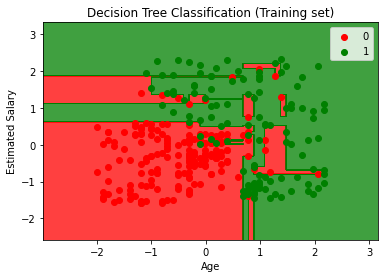

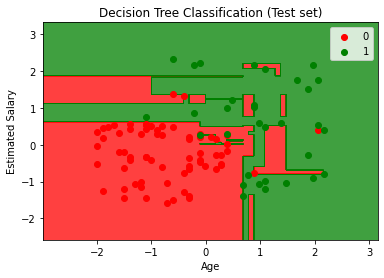

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("D:\Github\Machine-Learning-Basic-Codes")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


class Skylark_DecisionTreeClassifier(DecisionTree):
    '''
    分类树
    '''
    def _calculate_information_gain(self, y, y1, y2):
        # Calculate information gain
        p = len(y1) / len(y)
        entropy = calculate_entropy(y)
        info_gain = entropy - p * calculate_entropy(y1) - (1 - p) * \
                                                      calculate_entropy(y2)
        # print("info_gain",info_gain)
        return info_gain

    def _majority_vote(self, y):
        most_common = None
        max_count = 0
        for label in np.unique(y):
            # Count number of occurences of samples with label
            count = len(y[y == label])
            if count > max_count:
                most_common = label
                max_count = count
        # print("most_common :",most_common)
        return most_common

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_information_gain
        self._leaf_value_calculation = self._majority_vote
        super(Skylark_DecisionTreeClassifier, self).fit(X, y)

if __name__ == '__main__':
    use_sklearn = False

    # Data Preprocessing
    dataset = pd.read_csv('Social_Network_Ads.csv')
    X = dataset.iloc[:, [2, 3]].values
    Y = dataset.iloc[:, 4].values

    # Making Dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.25, random_state=0)

    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train.astype(np.float64))
    X_test = sc.transform(X_test.astype(np.float64))

    if use_sklearn:
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(
            criterion='entropy', random_state=0)
        classifier.fit(X_train, Y_train)
    else:
        classifier = Skylark_DecisionTreeClassifier()
        classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    print_confusion_matrix(
        Y_test, Y_pred, clf_name='Decision Tree Classification')

    # Visualising the Training set results
    visualization_clf(X_train, Y_train, classifier,
                  clf_name='Decision Tree Classification', set_name='Training')

    # Visualising the Test set results
    visualization_clf(X_test, Y_test, classifier,
                  clf_name='Decision Tree Classification', set_name='Test')

Mean Squared Error for DTR: 90.0


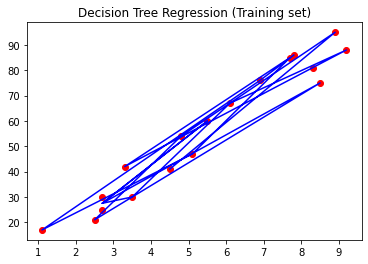

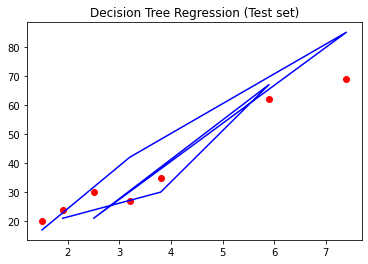

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("D:\Github\Machine-Learning-Basic-Codes")
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



class Skylark_DecisionTreeRegressor(DecisionTree):
    '''
    回归树
    '''
    def _calculate_variance_reduction(self, y, y1, y2):
        var_tot = calculate_variance(y)
        var_1 = calculate_variance(y1)
        var_2 = calculate_variance(y2)
        frac_1 = len(y1) / len(y)
        frac_2 = len(y2) / len(y)

        # Calculate the variance reduction
        variance_reduction = var_tot - (frac_1 * var_1 + frac_2 * var_2)

        return sum(variance_reduction)

    def _mean_of_y(self, y):
        value = np.mean(y, axis=0)
        return value if len(value) > 1 else value[0]

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_variance_reduction
        self._leaf_value_calculation = self._mean_of_y
        super(Skylark_DecisionTreeRegressor, self).fit(X, y)


if __name__ == '__main__':
    use_sklearn = True

# Data Preprocessing
    dataset = pd.read_csv('studentscores.csv')
    X = dataset.iloc[:, : 1].values
    Y = dataset.iloc[:, 1].values

    # Making Dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=1/4, random_state=0)

    if use_sklearn:
        from sklearn.tree import DecisionTreeRegressor
        regressor = DecisionTreeRegressor(
            criterion='mse', random_state=0)
        regressor.fit(X_train, Y_train)
    else:
        regressor = Skylark_DecisionTreeRegressor()
        regressor.fit(X_train, Y_train)

    Y_pred = regressor.predict(X_test)
    
    # MSE
    print_mse(Y_test, Y_pred, reg_name='DTR')

    # Visualization
    visualization_reg(X_train, Y_train, regressor,
                  reg_name='Decision Tree Regression', set_name='Training')
    visualization_reg(X_test, Y_test, regressor,
                  reg_name='Decision Tree Regression', set_name='Test')




tree 0 fit complete
tree 1 fit complete
tree 2 fit complete
tree 3 fit complete
tree 4 fit complete
tree 5 fit complete
tree 6 fit complete
tree 7 fit complete
tree 8 fit complete
tree 9 fit complete
Random Forest Classification:
 [[67  1]
 [14 18]]


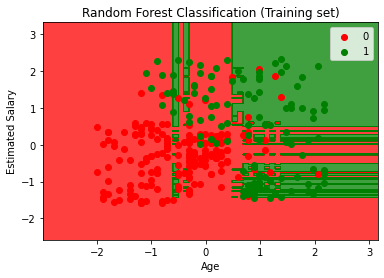

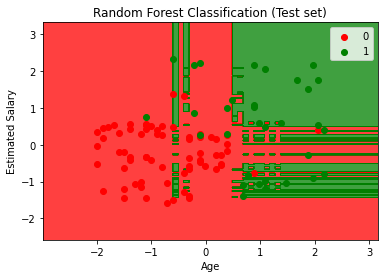

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sys
sys.path.append("D:\Github\Machine-Learning-Basic-Codes")
sys.path.append("D:/Github/Machine-Learning-Basic-Codes/07Decision_Trees")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


class Skylark_RandomForestClassifier():
    def __init__(self, n_estimators=100, min_samples_split=2, min_gain=0,
                 max_depth=float("inf"), max_features=None):
        super().__init__()
        self.n_estimators = n_estimators
        self.min_samples_split = min_samples_split
        self.min_gain = min_gain
        self.max_depth = max_depth
        self.max_features = max_features

        self.trees = []
        # 建立森林(bulid forest)
        for _ in range(self.n_estimators):
            tree = Skylark_DecisionTreeClassifier(min_samples_split=self.min_samples_split, min_impurity=self.min_gain,
                                                  max_depth=self.max_depth)
            self.trees.append(tree)

    def fit(self, X_train, Y_train):
        # 训练，每棵树使用随机的数据集(bootstrap)和随机的特征
        # every tree use random data set(bootstrap) and random feature
        sub_sets = self.get_bootstrap_data(X_train, Y_train)
        n_features = X_train.shape[1]
        if self.max_features == None:
            self.max_features = int(np.sqrt(n_features))
        for i in range(self.n_estimators):
            # 生成随机的特征
            # get random feature
            sub_X, sub_Y = sub_sets[i]
            idx = np.random.choice(n_features, self.max_features, replace=True)
            sub_X = sub_X[:, idx]
            self.trees[i].fit(sub_X, sub_Y)
            self.trees[i].feature_indices = idx
            print("tree", i, "fit complete")

    def predict(self, X_test):
        y_preds = []
        for i in range(self.n_estimators):
            idx = self.trees[i].feature_indices
            sub_X = X_test[:, idx]
            y_pre = self.trees[i].predict(sub_X)
            y_preds.append(y_pre)
        y_preds = np.array(y_preds).T
        y_pred = []
        for y_p in y_preds:
            # np.bincount()可以统计每个索引出现的次数
            # np.argmax()可以返回数组中最大值的索引
            # cheak np.bincount() and np.argmax() in numpy Docs
            y_pred.append(np.bincount(y_p.astype('int')).argmax())
        return np.array(y_pred)

    def get_bootstrap_data(self, X, Y):
        # 通过bootstrap的方式获得n_estimators组有放回的采样数据
        # get int(n_estimators) datas by bootstrap
        m = X.shape[0]
        Y = Y.reshape(m, 1)

        # 合并X和Y，方便bootstrap (conbine X and Y)
        X_Y = np.hstack((X, Y))
        np.random.shuffle(X_Y)

        data_sets = []
        for _ in range(self.n_estimators):
            idm = np.random.choice(m, m, replace=True)
            bootstrap_X_Y = X_Y[idm, :]
            bootstrap_X = bootstrap_X_Y[:, :-1]
            bootstrap_Y = bootstrap_X_Y[:, -1:]
            data_sets.append([bootstrap_X, bootstrap_Y])
        return data_sets


if __name__ == '__main__':
    use_sklearn = False

    # Data Preprocessing
    dataset = pd.read_csv('Social_Network_Ads.csv')
    X = dataset.iloc[:, [2, 3]].values
    Y = dataset.iloc[:, 4].values

    # Making Dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.25, random_state=0)

    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train.astype(np.float64))
    X_test = sc.transform(X_test.astype(np.float64))

    if use_sklearn:
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(
            n_estimators=10, criterion='entropy', random_state=0)
        classifier.fit(X_train, Y_train)
    else:
        classifier = Skylark_RandomForestClassifier(n_estimators=10)
        classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    print_confusion_matrix(
        Y_test, Y_pred, clf_name='Random Forest Classification')

    # Visualising the Training set results
    visualization_clf(X_train, Y_train, classifier,
                      clf_name='Random Forest Classification', set_name='Training')
    # Visualising the Test set results
    visualization_clf(X_test, Y_test, classifier,
                      clf_name='Random Forest Classification', set_name='Test')

For iteration # 0

Loss: 
0.26989816035010766


For iteration # 50

Loss: 
0.2698203578134397




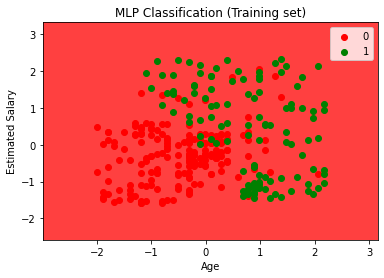

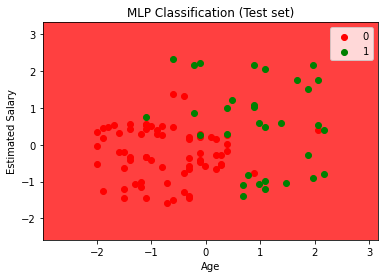

In [22]:
from torch import nn
import torch
from torch.utils import data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("D:\Github\Machine-Learning-Basic-Codes")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


class Skylark_Neural_Network():
    def __init__(self, input_size, hidden_sizes, num_classes):
        super().__init__()
        # y=wx+b
        self.w1 = np.random.rand(hidden_sizes[0], input_size)
        self.w2 = np.random.rand(hidden_sizes[1], hidden_sizes[0])
        self.w3 = np.random.rand(num_classes, hidden_sizes[1])
    
    def fit(self, X_train, Y_train, epochs, batch_size, learning_rate):
        # TODO: batch 
        self.X = X_train.T
        self.Y = Y_train.T
        self.learning_rate = learning_rate
        for i in range(epochs): # trains the NN 1,000 times
            if i % 50 ==0: 
                print ("For iteration # " + str(i) + "\n")
                print ("Loss: \n" + str(np.mean(np.square(Y_train - self.feedforward())))) # mean sum squared loss
                print ("\n")
            self.output = self.feedforward()
            self.backprop()
    
    def feedforward(self):
        self.layer1 = relu(np.dot(self.w1, self.X))
        self.layer2 = relu(np.dot(self.w2, self.layer1))
        self.layer3 = sigmoid(np.dot(self.w3, self.layer2))
        return self.layer3

    def backprop(self):
        input_data = self.X
        temp3 = 2*(self.Y - self.output) * sigmoid_derivative(self.output)
        d_w3 = np.dot(temp3, self.layer2.T)
        temp2 = np.dot(self.w3.T, temp3) * relu_derivative(self.layer2)
        d_w2 = np.dot(temp2, self.layer1.T)
        temp1 = np.dot(self.w2.T, temp2) * relu_derivative(self.layer1)
        d_w1 = np.dot(temp1, input_data.T)

        # Update parameters
        self.w1 += self.learning_rate * d_w1
        self.w2 += self.learning_rate * d_w2   
        self.w3 += self.learning_rate * d_w3 

    def predict(self, X_test):
        self.X = X_test.T
        y_pred = self.feedforward()
        return np.argmax(np.array(y_pred).T, axis=1).T

class Torch_NN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super().__init__()
        # define model architecture
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        # self.device = torch.device('gpu')
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[1], num_classes),
            nn.Sigmoid()
        ).to(self.device)
        
        print('Model:\n{}\nDevice: {}'.format(self.model, self.device))
    #     self.fc1 = nn.Linear(input_size, hidden_size[0]) 
    #     self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])
    #     self.fc2 = nn.Linear(hidden_size[1], num_classes)
    #     
    
    # def forward(self, x):
    #     x = self.fc1(x)
    #     x = nn.ReLU(x)
    #     x = self.fc2(x)
    #     x = nn.ReLU(x)
    #     x = self.fc3(x)
    #     out=nn.Sigmoid(x)
    #     return out
    
    def fit(self, X_train, Y_train, epochs, batch_size, learning_rate):
        dtype = torch.cuda.LongTensor if torch.cuda.is_available() else torch.LongTensor
        tensor_x = torch.Tensor(X_train) # transform from array to torch tensor
        tensor_y = torch.Tensor(Y_train)
        MyDataset = data.TensorDataset(tensor_x, tensor_y) # making the dataset
        # 数据加载器 DataLoader
        # 训练数据加载器
        train_loader = data.DataLoader(
            dataset=MyDataset, 
            batch_size=batch_size, shuffle=True)
        total_step = len(train_loader)
        
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)

        for epoch in range(epochs):
            for i, (x, labels) in enumerate(train_loader):
                x = x.to(self.device, dtype= torch.float)
                labels = labels.to(self.device, dtype= torch.long)

                # 前向传播
                outputs = self.model(x)
                loss = criterion(outputs, labels)

                # 反向传播并优化
                optimizer.zero_grad()  # 注意每步迭代都需要清空梯度缓存
                loss.backward()
                optimizer.step()

                if (i+1) % 30 == 0:
                    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                            .format(epoch+1, epochs, i+1, total_step, loss.item()))

    def predict(self, X_test):
        X_test = torch.Tensor(X_test).to(self.device)
        Y_pred = self.model(X_test)
        _, Y_pred = torch.max(Y_pred.data, 1)
        return Y_pred.cpu().detach().numpy()

if __name__ == '__main__':
    mode = 'self_implement'  # ['use_sklearn', 'use_keras', 'use_torch', 'self_implement']
    input_size = 2
    hidden_sizes = [12, 8]
    num_classes = 2
    output_size = 1
    learning_rate = 1e-5

    # Data Preprocessing
    dataset = pd.read_csv('Social_Network_Ads.csv')
    X = dataset.iloc[:, [2, 3]].values
    Y = dataset.iloc[:, 4].values

    # Making Dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.25, random_state=0)

    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train.astype(np.float64))
    X_test = sc.transform(X_test.astype(np.float64))

    if mode == 'use_sklearn':
        from sklearn.neural_network import MLPClassifier
        classifier = MLPClassifier(
            solver='lbfgs', alpha=learning_rate, hidden_layer_sizes=hidden_sizes, random_state=1)
        classifier.fit(X_train, Y_train)
    elif mode == 'use_keras':
        from keras.models import Sequential
        from keras.layers import Dense
        # define the keras model
        classifier = Sequential()
        classifier.add(Dense(hidden_sizes[0], input_dim=input_size, activation='relu'))
        classifier.add(Dense(hidden_sizes[1], activation='relu'))
        classifier.add(Dense(output_size, activation='sigmoid'))
        # compile the keras model
        classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        # fit the keras model on the dataset
        classifier.fit(X_train, Y_train, epochs=150, batch_size=10)
    elif mode == 'use_torch':
        classifier = Torch_NN(input_size, hidden_sizes, num_classes)
        classifier.fit(X_train, Y_train, epochs=150, batch_size=10, learning_rate = learning_rate)        
    elif mode == 'self_implement': # self-implement
        classifier = Skylark_Neural_Network(input_size, hidden_sizes, num_classes)
        classifier.fit(X_train, Y_train, epochs=100, batch_size=10, learning_rate = learning_rate)
    else:
        print('Attention: Wrong Mode!')

    Y_pred = classifier.predict(X_test)

    # # Making the Confusion Matrix
    # print_confusion_matrix(
    #     Y_test, Y_pred, clf_name='MLP Classification')

    # Visualising the Training set results
    visualization_clf(X_train, Y_train, classifier,
                      clf_name='MLP Classification', set_name='Training')
    # Visualising the Test set results
    visualization_clf(X_test, Y_test, classifier,
                      clf_name='MLP Classification', set_name='Test')

In [0]:
import numpy as np

class Softmax:
  # A standard fully-connected layer with softmax activation.
  def __init__(self, input_len, nodes):
    # We divide by input_len to reduce the variance of our initial values
    self.weights = np.random.randn(input_len, nodes) / input_len
    self.biases = np.zeros(nodes)

  def forward(self, input):
    '''
    Performs a forward pass of the softmax layer using the given input.
    Returns a 1d numpy array containing the respective probability values.
    - input can be any array with any dimensions.
    '''
    self.last_input_shape = input.shape

    input = input.flatten()
    self.last_input = input

    input_len, nodes = self.weights.shape

    totals = np.dot(input, self.weights) + self.biases
    self.last_totals = totals

    exp = np.exp(totals)
    return exp / np.sum(exp, axis=0)

  def backprop(self, d_L_d_out, learn_rate):
    '''
    Performs a backward pass of the softmax layer.
    Returns the loss gradient for this layer's inputs.
    - d_L_d_out is the loss gradient for this layer's outputs.
    - learn_rate is a float.
    '''
    # We know only 1 element of d_L_d_out will be nonzero
    for i, gradient in enumerate(d_L_d_out):
      if gradient == 0:
        continue

      # e^totals
      t_exp = np.exp(self.last_totals)

      # Sum of all e^totals
      S = np.sum(t_exp)

      # Gradients of out[i] against totals
      d_out_d_t = -t_exp[i] * t_exp / (S ** 2)
      d_out_d_t[i] = t_exp[i] * (S - t_exp[i]) / (S ** 2)

      # Gradients of totals against weights/biases/input
      d_t_d_w = self.last_input
      d_t_d_b = 1
      d_t_d_inputs = self.weights

      # Gradients of loss against totals
      d_L_d_t = gradient * d_out_d_t

      # Gradients of loss against weights/biases/input
      d_L_d_w = d_t_d_w[np.newaxis].T @ d_L_d_t[np.newaxis]
      d_L_d_b = d_L_d_t * d_t_d_b
      d_L_d_inputs = d_t_d_inputs @ d_L_d_t

      # Update weights / biases
      self.weights -= learn_rate * d_L_d_w
      self.biases -= learn_rate * d_L_d_b

      return d_L_d_inputs.reshape(self.last_input_shape)

In [0]:
import numpy as np

class MaxPool2:
  # A Max Pooling layer using a pool size of 2.

  def iterate_regions(self, image):
    '''
    Generates non-overlapping 2x2 image regions to pool over.
    - image is a 2d numpy array
    '''
    h, w, _ = image.shape
    new_h = h // 2
    new_w = w // 2

    for i in range(new_h):
      for j in range(new_w):
        im_region = image[(i * 2):(i * 2 + 2), (j * 2):(j * 2 + 2)]
        yield im_region, i, j

  def forward(self, input):
    '''
    Performs a forward pass of the maxpool layer using the given input.
    Returns a 3d numpy array with dimensions (h / 2, w / 2, num_filters).
    - input is a 3d numpy array with dimensions (h, w, num_filters)
    '''
    self.last_input = input

    h, w, num_filters = input.shape
    output = np.zeros((h // 2, w // 2, num_filters))

    for im_region, i, j in self.iterate_regions(input):
      output[i, j] = np.amax(im_region, axis=(0, 1))

    return output

  def backprop(self, d_L_d_out):
    '''
    Performs a backward pass of the maxpool layer.
    Returns the loss gradient for this layer's inputs.
    - d_L_d_out is the loss gradient for this layer's outputs.
    '''
    d_L_d_input = np.zeros(self.last_input.shape)

    for im_region, i, j in self.iterate_regions(self.last_input):
      h, w, f = im_region.shape
      amax = np.amax(im_region, axis=(0, 1))

      for i2 in range(h):
        for j2 in range(w):
          for f2 in range(f):
            # If this pixel was the max value, copy the gradient to it.
            if im_region[i2, j2, f2] == amax[f2]:
              d_L_d_input[i * 2 + i2, j * 2 + j2, f2] = d_L_d_out[i, j, f2]

    return d_L_d_input

In [0]:
import numpy as np

'''
Note: In this implementation, we assume the input is a 2d numpy array for simplicity, because that's
how our MNIST images are stored. This works for us because we use it as the first layer in our
network, but most CNNs have many more Conv layers. If we were building a bigger network that needed
to use Conv3x3 multiple times, we'd have to make the input be a 3d numpy array.
'''

class Conv3x3:
  # A Convolution layer using 3x3 filters.

  def __init__(self, num_filters):
    self.num_filters = num_filters

    # filters is a 3d array with dimensions (num_filters, 3, 3)
    # We divide by 9 to reduce the variance of our initial values
    self.filters = np.random.randn(num_filters, 3, 3) / 9 

  def iterate_regions(self, image):
    '''
    Generates all possible 3x3 image regions using valid padding.
    - image is a 2d numpy array.
    '''
    h, w = image.shape

    for i in range(h - 2):
      for j in range(w - 2):
        im_region = image[i:(i + 3), j:(j + 3)]
        yield im_region, i, j

  def forward(self, input):
    '''
    Performs a forward pass of the conv layer using the given input.
    Returns a 3d numpy array with dimensions (h, w, num_filters).
    - input is a 2d numpy array
    '''
    self.last_input = input

    h, w = input.shape
    output = np.zeros((h - 2, w - 2, self.num_filters))

    for im_region, i, j in self.iterate_regions(input):
      output[i, j] = np.sum(im_region * self.filters, axis=(1, 2))

    return output

  def backprop(self, d_L_d_out, learn_rate):
    '''
    Performs a backward pass of the conv layer.
    - d_L_d_out is the loss gradient for this layer's outputs.
    - learn_rate is a float.
    '''
    d_L_d_filters = np.zeros(self.filters.shape)

    for im_region, i, j in self.iterate_regions(self.last_input):
      for f in range(self.num_filters):
        d_L_d_filters[f] += d_L_d_out[i, j, f] * im_region

    # Update filters
    self.filters -= learn_rate * d_L_d_filters

    # We aren't returning anything here since we use Conv3x3 as the first layer in our CNN.
    # Otherwise, we'd need to return the loss gradient for this layer's inputs, just like every
    # other layer in our CNN.
    return None

In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) # 隐藏warning

from torch import nn
import torch
from torch.utils import data
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


class Skylark_CNN():
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes
        self.conv2d = Conv3x3(8)                # 32x32x1 -> 30x30x8
        self.pool = MaxPool2()                  # 30x30x8 -> 15x15x8
        self.softmax = Softmax(15 * 15 * 8, 10) # 15x15x8 -> 10
    
    def fit(self, X_train, Y_train, epochs, batch_size, learning_rate):
        for i in range(epochs): # trains the CNN in epochs
            loss = 0
            num_correct = 0
            for j, (image, label) in enumerate(zip(X_train, Y_train)):
                if j % 100 == 99:
                    print(
                        '[Step %d] Past 100 steps: Average Loss %.3f | Accuracy: %d%%' %
                        (j + 1, loss / 100, num_correct))
                    loss = 0
                    num_correct = 0

                loss, acc = self.train(image, label, lr=learning_rate)
                loss += loss
                num_correct += acc
    
    def forward(self, image, label):
        out = self.conv2d.forward((image/255)-0.5)
        out = self.pool.forward(out)
        out = self.softmax.forward(out)

        loss = -np.log(out[label])
        acc = 1 if np.argmax(out) == label else 0
        return out, loss, acc

    def train(self, image, label, lr = 0.005):
        out, loss, acc = self.forward(image, label)

        # Calculate initial gradient
        gradient = np.zeros(self.num_classes)
        gradient[label] = -1 / out[label]

        # Backprop
        gradient = self.softmax.backprop(gradient, lr)
        gradient = self.pool.backprop(gradient)
        gradient = self.conv2d.backprop(gradient, lr)
        return loss, acc

    def predict(self, X_test):
        out = self.conv2d.forward((X_test/255)-0.5)
        out = self.pool.forward(out)
        y_pred = self.softmax.forward(out)
        return y_pred
    
    def evaluate(self, X_test, Y_test):
        num_correct = 0
        total_loss = 0
        for j, (image, label) in enumerate(zip(X_test, Y_test)):
            _, loss, acc = self.forward(image, label)
            num_correct += acc
            total_loss += loss
        print('Test loss: {}\nTest accuracy: {}'.format(total_loss/X_test.shape[0], num_correct/X_test.shape[0]))

class Keras_CNN():
    def __init__(self, input_size, hidden_sizes, num_classes):
        super().__init__()
        self.classifier = Sequential([
            Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=input_size), # https://keras-cn.readthedocs.io/en/latest/layers/convolutional_layer/
            Activation('relu'),
            Conv2D(32, (3, 3)),
            Activation('relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(0.25),
            
            Conv2D(64, (3, 3), padding='same'),
            Activation('relu'),
            Conv2D(64, (3, 3)),
            Activation('relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(0.25),

            Flatten(),
            Dense(512),
            Activation('relu'),
            Dropout(0.5),
            Dense(num_classes),
            Activation('softmax'),
        ])
        self.classifier.summary()

    def fit(self, X_train, Y_train, epochs, batch_size, learning_rate=0.0001):
        X_train = X_train.astype('float32')
        X_train /= 255
        # initiate RMSprop optimizer
        opt = keras.optimizers.RMSprop(lr=learning_rate, decay=1e-6)
        # Let's train the model using RMSprop
        self.classifier.compile(loss='categorical_crossentropy', optimizer=opt,
                    metrics=['accuracy'])
        self.classifier.fit(X_train, Y_train,
            batch_size=batch_size,
            epochs=epochs,
            shuffle=True)

    def predict(self, X_test):
        y_pred = self.classifier.predict(X_test)
        return np.array(y_pred)
    
    def evaluate(self, X_test, Y_test):
        scores = self.classifier.evaluate(X_test, Y_test, verbose=1)
        # Visualize the result
        print('Test loss: {}\nTest accuracy: {}'.format(scores[0], scores[1]))

class Torch_CNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        # define model architecture
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(),
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, num_classes)
        ).to(self.device)
        print('Model:\n{}\nDevice: {}'.format(self.model, self.device))
    
    def fit(self, trainloader, epochs, batch_size, learning_rate=0.001):
       # Define a Loss func & Optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(self.model.parameters(), lr=learning_rate, momentum=0.9)

        # Training
        for epoch in range(epochs):
            running_loss = 0.0
            for i, (inputs, labels) in enumerate(trainloader):
                inputs = inputs.to(self.device, dtype= torch.float)
                labels = labels.to(self.device, dtype= torch.long)

                # Forward
                outputs = self.model(inputs)
                loss = criterion(outputs, labels)

                # Backward + Optimize
                optimizer.zero_grad()  # 注意每步迭代都需要清空梯度缓存
                loss.backward()
                optimizer.step()

                # print statistics
                running_loss += loss.item()
                if i % 2000 == 1999:    # print every 2000 mini-batches
                    print('[%d, %5d] loss: %.3f' %
                        (epoch + 1, i + 1, running_loss / 2000))
                    running_loss = 0.0
        print('Finished Training')

    def predict(self, X_test):
        X_test = torch.Tensor(X_test).to(self.device)
        Y_pred = self.model(X_test)
        _, Y_pred = torch.max(Y_pred.data, 1)
        return Y_pred.cpu().detach().numpy()

    def evaluate(self, testloader):
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                outputs = self.model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: %d %%' % (
            100 * correct / total))

class TF_CNN():
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.num_classes = num_classes
        self.input_size = input_size
        self.X = tf.placeholder(tf.float32, shape=[None, self.input_size])
        self.Y = tf.placeholder(tf.float32, shape=[None, self.num_classes])
        self.keep_prob = tf.placeholder(tf.float32)

    def conv2d(self, x, W, b, strides=1):
        # Conv2D wrapper, with bias and relu activation
        x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
        x = tf.nn.bias_add(x, b)
        return tf.nn.relu(x)

    def maxpool2d(self, x, k=2):
        # MaxPool2D wrapper
        return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                            padding='SAME')

    #创建模型
    def conv_net(self, x, weights, biases, dropout):
        x = tf.reshape(x, shape=[-1, 32, 32, 1])
        # Convolution Layer
        conv1 = self.conv2d(x, weights['wc1'], biases['bc1'])
        # Max Pooling (down-sampling)
        conv1 = self.maxpool2d(conv1, k=2)

        # Convolution Layer
        conv2 = self.conv2d(conv1, weights['wc2'], biases['bc2'])
        # Max Pooling (down-sampling)
        conv2 = self.maxpool2d(conv2, k=2)

        # Fully connected layer
        # Reshape conv2 output to fit fully connected layer input
        fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
        fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
        fc1 = tf.nn.relu(fc1)

        # Apply Dropout
        fc1 = tf.nn.dropout(fc1, dropout)
        # Output, class prediction
        out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
        return out

    def init_para(self, num_classes):
        # 设置权重和偏移
        weights = {
            # 5x5 conv, 1 input, 32 outputs
            'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])), ### 32
            # 5x5 conv, 32 inputs, 64 outputs
            'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
            # fully connected, 7*7*64 inputs, 1024 outputs
            'wd1': tf.Variable(tf.random_normal([8*8*64, 1024])),
            # 1024 inputs, 10 outputs (class prediction)
            'out': tf.Variable(tf.random_normal([1024, num_classes]))
        }

        biases = {
            'bc1': tf.Variable(tf.random_normal([32])),
            'bc2': tf.Variable(tf.random_normal([64])),
            'bd1': tf.Variable(tf.random_normal([1024])),
            'out': tf.Variable(tf.random_normal([num_classes]))
        }
        return weights, biases

    def fit(self, X_train, Y_train, sess, epochs, dropout=0.75, batch_size=128, learning_rate=0.001):
        weights, biases = self.init_para(self.num_classes)
        X_train = X_train.reshape((X_train.shape[0], self.input_size))
        # Construct model
        logits = self.conv_net(self.X, weights, biases, self.keep_prob)
        prediction = tf.nn.softmax(logits)
        pred = tf.argmax(prediction, 1)

        # Define loss and optimizer
        self.loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        self.train_op = self.optimizer.minimize(self.loss_op)

        # Evaluate model
        self.correct_pred = tf.equal(pred, tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_pred, tf.float32))

        self.init = tf.global_variables_initializer()
        # saver = tf.train.Saver(tf.trainable_variables())
        
        self.train(X_train, Y_train, sess, epochs, dropout, batch_size, learning_rate)

    def train(self, X_train, Y_train, sess, epochs, dropout=0.75, batch_size=128, learning_rate=0.001):
        display_step = 50 #显示间隔
        sess.run(self.init)
        for epoch in range(1, epochs+1):
            batch_x, batch_y = X_train[batch_size*(epoch-1): batch_size*epoch], Y_train[batch_size*(epoch-1): batch_size*epoch]
            # Run optimization op (backprop)
            sess.run(self.train_op, feed_dict={self.X: batch_x, self.Y: batch_y, self.keep_prob: dropout})
            if epoch % display_step == 0 or epoch == 1:
                # Calculate batch loss and accuracy
                loss, acc = sess.run([self.loss_op, self.accuracy], feed_dict={self.X: batch_x,
                                                                    self.Y: batch_y,
                                                                    self.keep_prob: 1.0})
                print("Step " + str(epoch) + ", Minibatch Loss={:.4f}".format(loss) + ", Training Accuracy={:.3f}".format(acc))

        
    def evaluate(self, X_test, Y_test, sess):
        X_test = X_test.reshape((X_test.shape[0], self.input_size))
        print('Test Acc: {}'.format(sess.run(self.accuracy, feed_dict={self.X: X_test[:500],
                                        self.Y: Y_test[:500],
                                        self.keep_prob: 1.0})))



def keras_data(num_classes):
    # Data Preprocessing
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
    # Convert class vectors to binary class matrices.
    Y_train = keras.utils.to_categorical(Y_train, num_classes)
    Y_test = keras.utils.to_categorical(Y_test, num_classes)
    input_size = X_train.shape[1:]
    return X_train, Y_train, X_test, Y_test

def Torch_data():
    transform = transforms.Compose([transforms.ToTensor(), 
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    trainset = torchvision.datasets.CIFAR10(root='./dataset', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                            shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./dataset', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                            shuffle=False, num_workers=2)
    return trainloader, testloader

def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

def one_hot_encode(x):
    """
        argument
            - x: a list of labels
        return
            - one hot encoding matrix (number of labels, number of class)
    """
    encoded = np.zeros((len(x), 10))

    for idx, val in enumerate(x):
        encoded[idx][val] = 1

    return encoded

def rgb2gray(rgb):
    """Convert from color image (RGB) to grayscale.
       Source: opencv.org
       grayscale = 0.299*red + 0.587*green + 0.114*blue
    Argument:
        rgb (tensor): rgb image
    Return:
        (tensor): grayscale image
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [0]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed
from keras.layers import LSTM
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) # 隐藏warning

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import collections

import sys
sys.path.append("/home/skylark/Github/Machine-Learning-Basic-Codes")


class Skylark_LSTM():
    def __init__(self, input_size, hidden_size, seq_length):
        self.seq_length = seq_length 
        self.H = hidden_size # Number of LSTM layer's neurons
        self.D = input_size # Number of input dimension == number of items in vocabulary
        Z = self.H + self.D # Because we will concatenate LSTM state with the input

        self.model = dict(
            Wf=np.random.randn(Z, self.H) / np.sqrt(Z / 2.),
            Wi=np.random.randn(Z, self.H) / np.sqrt(Z / 2.),
            Wc=np.random.randn(Z, self.H) / np.sqrt(Z / 2.),
            Wo=np.random.randn(Z, self.H) / np.sqrt(Z / 2.),
            Wy=np.random.randn(self.H, self.D) / np.sqrt(self.D / 2.),
            bf=np.zeros((1, self.H)),
            bi=np.zeros((1, self.H)),
            bc=np.zeros((1, self.H)),
            bo=np.zeros((1, self.H)),
            by=np.zeros((1, self.D))
        )

    def lstm_forward(self, X, state):
        m = self.model
        Wf, Wi, Wc, Wo, Wy = m['Wf'], m['Wi'], m['Wc'], m['Wo'], m['Wy']
        bf, bi, bc, bo, by = m['bf'], m['bi'], m['bc'], m['bo'], m['by']

        h_old, c_old = state

        # One-hot encode
        X_one_hot = np.zeros(self.D)
        X_one_hot[X] = 1.
        X_one_hot = X_one_hot.reshape(1, -1)
        # X = np.array(X).reshape(1, -1)

        # Concatenate old state with current input
        X = np.column_stack((h_old, X_one_hot))

        hf = sigmoid(X @ Wf + bf)
        hi = sigmoid(X @ Wi + bi)
        ho = sigmoid(X @ Wo + bo)
        hc = tanh(X @ Wc + bc)

        c = hf * c_old + hi * hc
        h = ho * tanh(c)

        y = h @ Wy + by
        prob = softmax(y)

        state = (h, c) # Cache the states of current h & c for next iter
        cache = (hf, hi, ho, hc, c, h, y, Wf, Wi, Wc, Wo, Wy, X, c_old) # Add all intermediate variables to this cache

        return prob, state, cache

    def lstm_backward(self, prob, y_train, d_next, cache):
        # Unpack the cache variable to get the intermediate variables used in forward step
        hf, hi, ho, hc, c, h, y, Wf, Wi, Wc, Wo, Wy, X, c_old = cache
        dh_next, dc_next = d_next

        # Softmax loss gradient
        dy = prob.copy()
        dy -= y_train
        dy = sigmoid_derivative(dy)

        # Hidden to output gradient
        dWy = h.T @ dy
        dby = dy
        # Note we're adding dh_next here
        dh = dy @ Wy.T + dh_next

        # Gradient for ho in h = ho * tanh(c)
        dho = tanh(c) * dh
        dho = sigmoid_derivative(ho) * dho

        # Gradient for c in h = ho * tanh(c), note we're adding dc_next here
        dc = ho * dh * tanh_derivative(c)
        dc = dc + dc_next

        # Gradient for hf in c = hf * c_old + hi * hc
        dhf = c_old * dc
        dhf = sigmoid_derivative(hf) * dhf

        # Gradient for hi in c = hf * c_old + hi * hc
        dhi = hc * dc
        dhi = sigmoid_derivative(hi) * dhi

        # Gradient for hc in c = hf * c_old + hi * hc
        dhc = hi * dc
        dhc = tanh_derivative(hc) * dhc

        # Gate gradients, just a normal fully connected layer gradient
        dWf = X.T @ dhf
        dbf = dhf
        dXf = dhf @ Wf.T

        dWi = X.T @ dhi
        dbi = dhi
        dXi = dhi @ Wi.T

        dWo = X.T @ dho
        dbo = dho
        dXo = dho @ Wo.T

        dWc = X.T @ dhc
        dbc = dhc
        dXc = dhc @ Wc.T

        # As X was used in multiple gates, the gradient must be accumulated here
        dX = dXo + dXc + dXi + dXf
        # Split the concatenated X, so that we get our gradient of h_old
        dh_next = dX[:, :self.H]
        # Gradient for c_old in c = hf * c_old + hi * hc
        dc_next = hf * dc

        grad = dict(Wf=dWf, Wi=dWi, Wc=dWc, Wo=dWo, Wy=dWy, bf=dbf, bi=dbi, bc=dbc, bo=dbo, by=dby)
        state = (dh_next, dc_next)

        return grad, state

    def fit(self, X_train, batch_size, epochs, state):
        probs = []
        caches = []
        loss = 0.
        h, c = state
        print('Forward Start')

        for epoch in range(epochs):
            for i in range(0, self.D - self.seq_length, self.seq_length):
                # Get mini-batch inputs and targets
                inputs = X_train[i:i+self.seq_length]
                targets = X_train[(i+1):(i+1)+self.seq_length]

                # Forward Step
                for x, y_true in zip(inputs, targets):
                    prob, state, cache = self.lstm_forward(x, state)
                    loss += cross_entropy(prob, y_true)

                    # Store forward step result to be used in backward step
                    probs.append(prob)
                    caches.append(cache)
                print('Forward Finish')
                # The loss is the average cross entropy
                loss /= np.array(inputs).shape[0]

                # Backward Step
                # Gradient for dh_next and dc_next is zero for the last timestep
                d_next = (np.zeros_like(h), np.zeros_like(c))
                grads = {k: np.zeros_like(v) for k, v in self.model.items()}

                # Go backward from the last timestep to the first
                for prob, y_true, cache in reversed(list(zip(probs, targets, caches))):
                    grad, d_next = self.lstm_backward(prob, y_true, d_next, cache)

                    # Accumulate gradients from all timesteps
                    for k in grads.keys():
                        grads[k] += grad[k]
                print('Backward Finish')

        print('Loss：{}'.format(loss))
        return grads, loss, state

class Keras_LSTM():
    def __init__(self, vocabulary, hidden_size, seq_length, use_dropout=True):
        super().__init__()
        self.vocabulary = vocabulary
        self.seq_length = seq_length
        self.model = Sequential()
        self.model.add(Embedding(vocabulary, hidden_size, input_length=self.seq_length))
        self.model.add(LSTM(hidden_size, return_sequences=True))
        self.model.add(LSTM(hidden_size, return_sequences=True))
        if use_dropout:
            self.model.add(Dropout(0.5))
        self.model.add(TimeDistributed(Dense(self.vocabulary)))
        self.model.add(Activation('softmax'))
        self.model.summary()
    
    def fit(self, train_data, valid_data, batch_size, num_epochs):
        checkpointer = ModelCheckpoint('./log/Keras_LSTM/model-{epoch:02d}.hdf5', verbose=1)
        train_data_generator = KerasBatchGenerator(train_data, self.seq_length, batch_size, self.vocabulary,
                                           skip_step=self.seq_length)
        valid_data_generator = KerasBatchGenerator(valid_data, self.seq_length, batch_size, self.vocabulary,
                                           skip_step=self.seq_length)
        # initiate Adam optimizer
        opt = keras.optimizers.Adam()
        # Let's train the model using Adam
        self.model.compile(loss='categorical_crossentropy', optimizer=opt , metrics=['categorical_accuracy'])
        self.model.fit_generator(train_data_generator.generate(), len(train_data)//(batch_size*self.seq_length), num_epochs,
                    validation_data=valid_data_generator.generate(),
                    validation_steps=len(valid_data)//(batch_size*self.seq_length), callbacks=[checkpointer])
    
    def evaluate(self, test_data, reversed_dictionary):
        example_test_generator = KerasBatchGenerator(test_data, self.seq_length, 1, self.vocabulary,
                                                     skip_step=1)
        dummy_iters = 40
        num_predict = 10
        true_print_out = "Actual words: "
        pred_print_out = "Predicted words: "
        for i in range(num_predict):
            data = next(example_test_generator.generate())
            prediction = self.model.predict(data[0])
            predict_word = np.argmax(prediction[:, self.seq_length - 1, :])
            true_print_out += reversed_dictionary[test_data[self.seq_length + dummy_iters + i]] + " "
            pred_print_out += reversed_dictionary[predict_word] + " "
        print(true_print_out)
        print(pred_print_out)

class Torch_LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers):
        super().__init__()
        torch.manual_seed(1)
        self.hidden_dim = hidden_dim
        # self.model = nn.ModuleDict({
        #     'word_embeddings': nn.Embedding(vocab_size, embedding_dim),
        #     'lstm': nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim),
        #     'linear': nn.Linear(in_features = hidden_dim, out_features = tagset_size)
        # })
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, vocab_size)
        
    def forward(self, X_train, h):
        # Embed word ids to vectors
        x = self.word_embeddings(X_train)
        # Forward propagate LSTM
        out, (h, c) = self.lstm(x, h)
        # Reshape output to (batch_size*sequence_length, hidden_size)
        out = out.reshape(out.size(0)*out.size(1), out.size(2))
        # Decode hidden states of all time steps
        out = self.linear(out)
        return out, (h, c)

    # def forward(self, X_train, h):
    #     # Embed word ids to vectors
    #     x = self.word_embeddings(X_train)
    #     # Data is fed to the LSTM
    #     out, (h, c) = self.model['lstm'](x)
    #     print(f'lstm output={out.size()}')
    #     # Reshape output to (batch_size*sequence_length, hidden_size)
    #     out = out.reshape(out.size(0)*out.size(1), out.size(2))
    #     # Decode hidden states of all time steps
    #     out = self.linear(out)
    #     return out, (h, c)


### ----------------------------------- 数据处理部分 ---------------------------------------
## --------------- Keras data processing --------------
class KerasBatchGenerator(object):
    def __init__(self, data, seq_length, batch_size, vocabulary, skip_step=5):
        self.data = data
        self.seq_length = seq_length
        self.batch_size = batch_size
        self.vocabulary = vocabulary
        # this will track the progress of the batches sequentially through the
        # data set - once the data reaches the end of the data set it will reset
        # back to zero
        self.current_idx = 0
        # skip_step is the number of words which will be skipped before the next
        # batch is skimmed from the data set
        self.skip_step = skip_step

    def generate(self):
        x = np.zeros((self.batch_size, self.seq_length))
        y = np.zeros((self.batch_size, self.seq_length, self.vocabulary))
        while True:
            for i in range(self.batch_size):
                if self.current_idx + self.seq_length >= len(self.data):
                    # reset the index back to the start of the data set
                    self.current_idx = 0
                x[i, :] = self.data[self.current_idx:self.current_idx + self.seq_length]
                temp_y = self.data[self.current_idx + 1:self.current_idx + self.seq_length + 1]
                # convert all of temp_y into a one hot representation
                y[i, :, :] = to_categorical(temp_y, num_classes=self.vocabulary)
                self.current_idx += self.skip_step
            print('X: {}, Y: {}'.format(x, y))
            yield x, y
import numpy as np
def keras_data():
    data_path = './dataset/PTB_data'
    # get the data paths
    train_path = np.genfromtxt(fname='ptb.train.txt')
    valid_path = os.path.isfile( "ptb.valid.txt")
    test_path = os.path.isfile( "ptb.test.txt")

    # build the complete vocabulary, then convert text data to list of integers
    word_to_id = build_vocab(train_path)
    train_data = file_to_word_ids(train_path, word_to_id)
    valid_data = file_to_word_ids(valid_path, word_to_id)
    test_data = file_to_word_ids(test_path, word_to_id)
    vocabulary = len(word_to_id)
    reversed_dictionary = dict(zip(word_to_id.values(), word_to_id.keys()))

    print(train_data[:5])
    # print(word_to_id)
    print(vocabulary)
    print(" ".join([reversed_dictionary[x] for x in train_data[:10]]))
    return train_data, valid_data, test_data, vocabulary, reversed_dictionary

def read_words(filename):
    with tf.gfile.GFile(filename, "r") as f:
        return f.read().replace("\n", "<eos>").split()


def build_vocab(filename):
    data = read_words(filename)

    counter = collections.Counter(data)
    count_pairs = sorted(counter.items(), key=lambda x: (-x[1], x[0]))

    words, _ = list(zip(*count_pairs))
    word_to_id = dict(zip(words, range(len(words))))

    return word_to_id


def file_to_word_ids(filename, word_to_id):
    data = read_words(filename)
    return [word_to_id[word] for word in data if word in word_to_id]

## --------------- Pytorch data processing --------------
class Dictionary(object):
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0
    
    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1
    
    def __len__(self):
        return len(self.word2idx)


class Corpus(object):
    def __init__(self):
        self.dictionary = Dictionary()

    def get_data(self, path, batch_size=20):
        # Add words to the dictionary
        with open(path, 'r') as f:
            tokens = 0
            for line in f:
                words = line.split() + ['<eos>']
                tokens += len(words)
                for word in words: 
                    self.dictionary.add_word(word)  
        
        # Tokenize the file content
        ids = torch.LongTensor(tokens)
        token = 0
        with open(path, 'r') as f:
            for line in f:
                words = line.split() + ['<eos>']
                for word in words:
                    ids[token] = self.dictionary.word2idx[word]
                    token += 1
        num_batches = ids.size(0) // batch_size
        ids = ids[:num_batches*batch_size]
        return ids.view(batch_size, -1)

# 定义函数：截断反向传播
def detach(states):
    return [state.detach() for state in states]

In [59]:


if __name__ == '__main__':
    mode = 'self_implement'  # ['use_tf', 'use_keras', 'use_torch', 'self_implement']
    embed_size = 128
    hidden_size = 1024
    num_epochs = 50
    batch_size = 20
    learning_rate = 0.002
    num_layers = 1
    num_samples = 1000     # number of words to be sampled
    seq_length = 30

    if mode == 'use_keras': # For more info: https://adventuresinmachinelearning.com/keras-lstm-tutorial/
        train_data, valid_data, test_data, vocab_size, reversed_dictionary = keras_data()
        model = Keras_LSTM(vocab_size, hidden_size, seq_length)
        model.fit(train_data, valid_data, batch_size, num_epochs)
        model.evaluate(test_data, reversed_dictionary)
    elif mode == 'use_torch': # Sorry everyone! 
        ## I cannot find a way to package train and fit into class
        corpus = Corpus() # Two dictionaries of idx2word: {id: 'vocabulary'} and word2idx: {'vocabulary': id}
        ids = corpus.get_data('ptb.train.txt', batch_size) # (bacth_size, 46479)
        vocab_size = len(corpus.dictionary)
        num_batches = ids.size(1) // seq_length
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        model = Torch_LSTM(vocab_size, embed_size, hidden_size, num_layers).to(device)
        # 定义损失函数和优化器
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

        for epoch in range(num_epochs):
            # 初始化隐状态和细胞状态
            init_state = (torch.zeros(num_layers, batch_size, hidden_size).to(device),
                            torch.zeros(num_layers, batch_size, hidden_size).to(device) )
            
            for i in range(0, ids.size(1) - seq_length, seq_length):
                # Get mini-batch inputs and targets
                inputs = ids[:, i:i+seq_length].to(device)          # (batch_size, seq_length)
                targets = ids[:, (i+1):(i+1)+seq_length].to(device) # (batch_size, seq_length)
                # Forward pass
                init_state = detach(init_state)
                outputs, states = model(inputs, init_state)
                loss = criterion(outputs, targets.reshape(-1))
                # Backward and optimize
                model.zero_grad()
                loss.backward()
                nn.utils.clip_grad_norm(model.parameters(), 0.5)
                optimizer.step()

                step = (i+1) // seq_length
                if step % 100 == 0:
                    print ('Epoch [{}/{}], Step[{}/{}], Loss: {:.4f}, Perplexity: {:5.2f}'
                        .format(epoch+1, num_epochs, step, num_batches, loss.item(), np.exp(loss.item())))

        # model.evaluate(testloader)      
    elif mode == 'use_tf':
        model = TF_LSTM() # TODO
        model.fit(X_train, Y_train)
    elif mode == 'self_implement': # self-implement

        model = Skylark_LSTM(len(train_data), hidden_size, seq_length)
        model.fit(train_data, batch_size, num_epochs, init_state)
    else:
        print('Attention: Wrong Mode!')

NameError: ignored

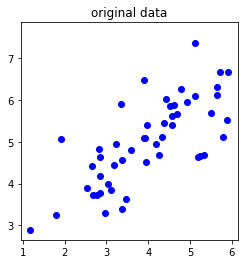

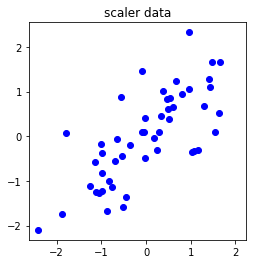

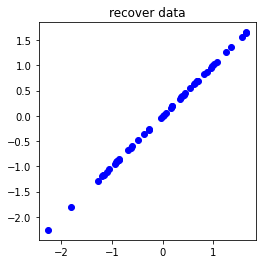

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import io as spio
import sys
sys.path.append("/home/skylark/Github/Machine-Learning-Basic-Codes")

from sklearn.preprocessing import StandardScaler


class Skylark_PCA():
    def __init__(self, n_components):
        self.K = n_components

    def fit(self, X_train):
        ...

    def transform(self, X_train):
        U = self.SVD_decompose(X_train)
        Ureduce = U[:, 0:self.K]
        Z = np.dot(X_train, Ureduce)
        self.components_ = np.transpose(Ureduce)
        return Z

    def SVD_decompose(self, X_train):
        m=X_train.shape[0]
        Cov = np.dot(np.transpose(X_train), X_train)/m # 协方差阵
        U,S,V = np.linalg.svd(Cov)
        return U


def PCA_load_data(data_name):
    if data_name == 'data':
        '''加载数据并作图'''
        data = spio.loadmat('data.mat')
        X = data['X']
        plt = plot_data_2d(X,'bo')
        plt.axis('square')
        plt.title('original data')
        plt.show()
    elif data_name == 'data_faces':
        '''加载数据并显示'''
        image_data = spio.loadmat('data_faces.mat')
        X = image_data['X']
        display_imageData(X[0:100,:])  # 显示100个最初图像
    else:
        print('Undefined Dataset!')

    '''归一化数据并作图'''
    scaler = StandardScaler()
    scaler.fit(X)
    x_train = scaler.transform(X)
    
    if data_name == 'data':
        plot_data_2d(x_train, 'bo')
        plt.axis('square')
        plt.title('scaler data')
        plt.show()
    return x_train

def PCA_result(Z, data_name):
    '''数据恢复并作图'''
    Ureduce = model.components_     # 得到降维用的Ureduce
    x_rec = np.dot(Z, Ureduce)       # 数据恢复
    
    if data_name == 'data':
        plot_data_2d(x_rec,'bo')
        plt.plot()
        plt.axis('square')
        plt.title('recover data')
        plt.show()
    elif data_name == 'data_face':
        display_imageData(Ureduce[0:36,:])  # 可视化部分U数据
        display_imageData(x_rec[0:100,:])  # 显示恢复的数据


if __name__ == "__main__":
    use_sklearn = False
    data_name = 'data'


    K=1 # 降维后的维度
    X_train = PCA_load_data(data_name)

    if use_sklearn:
        from sklearn.decomposition import pca
        model = pca.PCA(n_components=K)
        model.fit(X_train)
    else:
        model = Skylark_PCA(n_components=K)
        model.fit(X_train)

    Z = model.transform(X_train)    # transform就会执行降维操作
    PCA_result(Z, data_name)

迭代计算次数：1
迭代计算次数：2
迭代计算次数：3
迭代计算次数：4
迭代计算次数：5
迭代计算次数：6
迭代计算次数：7
迭代计算次数：8
迭代计算次数：9
迭代计算次数：10


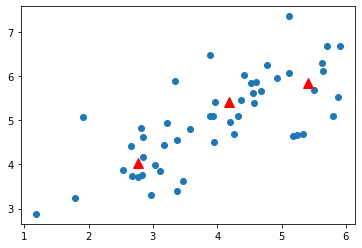

In [61]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import io as spio
import sys
sys.path.append("D:/Github/Machine-Learning-Basic-Codes")

from sklearn.preprocessing import StandardScaler


class Skylark_K_Means():
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
    
    def fit(self, X_train, max_iters = 10):
        centroids = self.initCentroids(X_train, self.n_clusters)
        m, n = X_train.shape

        for i in range(max_iters):      # 迭代次数
            print(u'迭代计算次数：%d'%(i+1))
            idx = self.findClosestCentroids(X_train, centroids)
            centroids = self.computerCentroids(X_train, idx, self.n_clusters)    # 重新计算类中心
        self.cluster_centers_ = centroids

    # init centroids with random samples
    def initCentroids(self, data, k):
        numSamples, dim = data.shape
        centroids = np.zeros((k, dim))
        for i in range(k):
            index = int(np.random.uniform(0, numSamples))
            centroids[i, :] = data[index, :]
        return np.array(centroids)
    
    # 找到每条数据距离哪个类中心最近    
    def findClosestCentroids(self, X, initial_centroids):
        m = X.shape[0]                  # 数据条数
        K = initial_centroids.shape[0]  # 类的总数
        dis = np.zeros((m,K))           # 存储计算每个点分别到K个类的距离
        idx = np.zeros((m,1))           # 要返回的每条数据属于哪个类
        
        '''计算每个点到每个类中心的距离'''
        for i in range(m):
            for j in range(K):
                dis[i,j] = np.dot((X[i,:]-initial_centroids[j,:]).reshape(1,-1),(X[i,:]-initial_centroids[j,:]).reshape(-1,1))
        
        '''返回dis每一行的最小值对应的列号，即为对应的类别
        - np.min(dis, axis=1)返回每一行的最小值
        - np.where(dis == np.min(dis, axis=1).reshape(-1,1)) 返回对应最小值的坐标
        - 注意：可能最小值对应的坐标有多个，where都会找出来，所以返回时返回前m个需要的即可（因为对于多个最小值，属于哪个类别都可以）
        '''  
        dummy,idx = np.where(dis == np.min(dis, axis=1).reshape(-1,1))
        return idx[0:dis.shape[0]]  # 注意截取一下

    # 计算类中心
    def computerCentroids(self, X,idx,K):
        n = X.shape[1]
        centroids = np.zeros((K,n))
        for i in range(K):
            centroids[i,:] = np.mean(X[np.ravel(idx==i),:], axis=0).reshape(1,-1)   # 索引要是一维的,axis=0为每一列，idx==i一次找出属于哪一类的，然后计算均值
        return centroids

    def predict(self, X_test):
        return self.findClosestCentroids(X_test, self.cluster_centers_)

if __name__ == "__main__":
    use_sklearn = False

    n_clusters=3 # 聚类的类数
    X_train = spio.loadmat('data.mat')['X']

    if use_sklearn:
        from sklearn.cluster import KMeans
        model = KMeans(n_clusters = n_clusters)
        model.fit(X_train)
    else:
        model = Skylark_K_Means(n_clusters = n_clusters)
        model.fit(X_train)

    centroids = model.cluster_centers_  # 聚类中心
    kmeans_plot(X_train, centroids)

AdaBoost Classification:
 [[65  3]
 [ 6 26]]


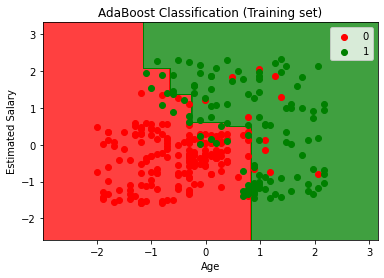

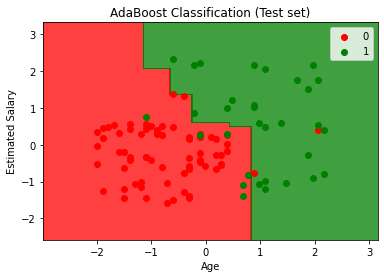

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("D:/Github/Machine-Learning-Basic-Codes")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


class Skylark_Adaboost_Clf():
    def __init__(self):
        super().__init__()
    
    def fit(self, X_train, Y_train):
        ...
        

if __name__ == '__main__':
    use_xgboost_api = True

    # Data Preprocessing
    dataset = pd.read_csv('Social_Network_Ads.csv')
    X = dataset.iloc[:, [2, 3]].values
    Y = dataset.iloc[:, 4].values

    # Making Dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.25, random_state=0)

    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train.astype(np.float64))
    X_test = sc.transform(X_test.astype(np.float64))

    if use_xgboost_api:
        from sklearn.ensemble import AdaBoostClassifier
        classifier = AdaBoostClassifier(learning_rate=0.1, n_estimators=140, algorithm='SAMME')
        classifier.fit(X_train, Y_train)
    else:
        classifier = Skylark_Adaboost_Clf()
        classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    print_confusion_matrix(
        Y_test, Y_pred, clf_name='AdaBoost Classification')

    # Visualising the Training set results
    visualization_clf(X_train, Y_train, classifier,
                  clf_name='AdaBoost Classification', set_name='Training')
    # Visualising the Test set results
    visualization_clf(X_test, Y_test, classifier,
                  clf_name='AdaBoost Classification', set_name='Test')

Training: 100% [-----------------------------------------------] Time:  0:00:45


Gradient Boost Decision Tree Classification:
 [[57 11]
 [21 11]]


Training: 100% [-----------------------------------------------] Time:  0:00:45


Gradient Boost Decision Tree Classification:
 [[57 11]
 [21 11]]


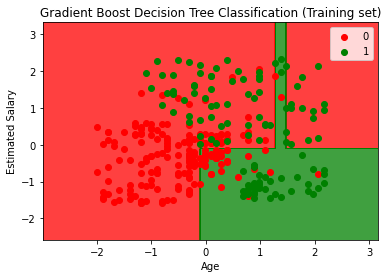

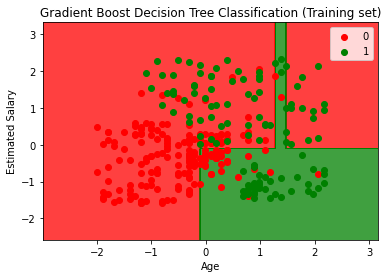

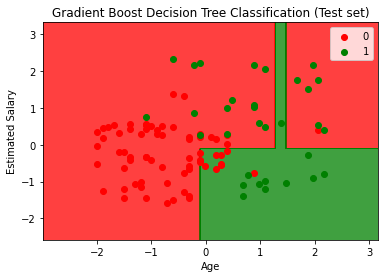

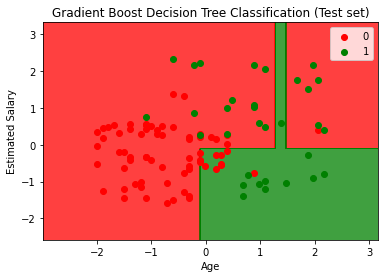

In [63]:
import numpy as np
import pandas as pd
import sys
sys.path.append("D:/Github/Machine-Learning-Basic-Codes")
sys.path.append("D:/Github/Machine-Learning-Basic-Codes/07Decision_Trees")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


class GBDT(object):
    """Super class of GradientBoostingClassifier and GradientBoostinRegressor.
    Uses a collection of regression trees that trains on predicting the gradient
    of the loss function.
    Parameters:
    -----------
    n_estimators: int
        树的数量
        The number of classification trees that are used.
    learning_rate: float
        梯度下降的学习率
        The step length that will be taken when following the negative gradient during
        training.
    min_samples_split: int
        每棵子树的节点的最小数目（小于后不继续切割）
        The minimum number of samples needed to make a split when building a tree.
    min_impurity: float
        每颗子树的最小纯度（小于后不继续切割）
        The minimum impurity required to split the tree further.
    max_depth: int
        每颗子树的最大层数（大于后不继续切割）
        The maximum depth of a tree.
    regression: boolean
        是否为回归问题
        True or false depending on if we're doing regression or classification.
    """

    def __init__(self, n_estimators, learning_rate, min_samples_split,
                 min_impurity, max_depth, regression):

        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        self.regression = regression

        # 进度条 processbar
        self.bar = progressbar.ProgressBar(widgets=bar_widgets)

        self.loss = SquareLoss()
        if not self.regression:
            self.loss = SotfMaxLoss()

        # 分类问题也使用回归树，利用残差去学习概率
        self.trees = []
        for i in range(self.n_estimators):
            self.trees.append(Skylark_DecisionTreeRegressor(min_samples_split=self.min_samples_split,
                                             min_impurity=self.min_impurity,
                                             max_depth=self.max_depth))

    def fit(self, X, y):
        # 让第一棵树去拟合模型
        self.trees[0].fit(X, y)
        y_pred = self.trees[0].predict(X)
        for i in self.bar(range(1, self.n_estimators)):
            gradient = self.loss.gradient(y, y_pred)
            self.trees[i].fit(X, gradient)
            y_pred -= np.multiply(self.learning_rate, self.trees[i].predict(X))

    def predict(self, X):
        y_pred = self.trees[0].predict(X)
        for i in range(1, self.n_estimators):
            y_pred -= np.multiply(self.learning_rate, self.trees[i].predict(X))

        if not self.regression:
            # Turn into probability distribution
            y_pred = np.exp(y_pred) / np.expand_dims(np.sum(np.exp(y_pred), axis=1), axis=1)
            # Set label to the value that maximizes probability
            y_pred = np.argmax(y_pred, axis=1)
        return y_pred


class Skylark_GBDT_Clf(GBDT):
    def __init__(self, n_estimators=200, learning_rate=.5, min_samples_split=2,
                 min_info_gain=1e-7, max_depth=2, debug=False):
        super(Skylark_GBDT_Clf, self).__init__(n_estimators=n_estimators,
                                             learning_rate=learning_rate,
                                             min_samples_split=min_samples_split,
                                             min_impurity=min_info_gain,
                                             max_depth=max_depth,
                                             regression=False)

    def fit(self, X, y):
        y = to_categorical(y)
        super(Skylark_GBDT_Clf, self).fit(X, y)

if __name__ == '__main__':
    use_api = False

    # Data Preprocessing
    dataset = pd.read_csv('Social_Network_Ads.csv')
    X = dataset.iloc[:, [2, 3]].values
    Y = dataset.iloc[:, 4].values

    # Making Dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.25, random_state=0)

    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train.astype(np.float64))
    X_test = sc.transform(X_test.astype(np.float64))

    if use_api:
        from sklearn.ensemble import GradientBoostingClassifier
        classifier = GradientBoostingClassifier(n_estimators=140, max_depth=2, min_samples_split=2, learning_rate=0.1)
        classifier.fit(X_train, Y_train)
    else:
        classifier = Skylark_GBDT_Clf()
        classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    print_confusion_matrix(
        Y_test, Y_pred, clf_name='Gradient Boost Decision Tree Classification')

    # Visualising the Training set results
    visualization_clf(X_train, Y_train, classifier,
                  clf_name='Gradient Boost Decision Tree Classification', set_name='Training')
    # Visualising the Test set results
    visualization_clf(X_test, Y_test, classifier,
                  clf_name='Gradient Boost Decision Tree Classification', set_name='Test')

In [65]:
import numpy as np
import pandas as pd
import sys
sys.path.append("D:/Github/Machine-Learning-Basic-Codes")
sys.path.append("D:/Github/Machine-Learning-Basic-Codes/07Decision_Trees")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


class XGBoostRegressionTree(DecisionTree):
    """
    Regression tree for XGBoost
    - Reference -
    http://xgboost.readthedocs.io/en/latest/model.html
    """

    def _split(self, y):
        """ y contains y_true in left half of the middle column and
        y_pred in the right half. Split and return the two matrices """
        col = int(np.shape(y)[1]/2)
        y, y_pred = y[:, :col], y[:, col:]
        return y, y_pred

    def _gain(self, y, y_pred):
        nominator = np.power((self.loss.gradient(y, y_pred)).sum(), 2)
        denominator = self.loss.hess(y, y_pred).sum()
        return 0.5 * (nominator / denominator)

    def _gain_by_taylor(self, y, y1, y2):
        # Split
        y, y_pred = self._split(y)
        y1, y1_pred = self._split(y1)
        y2, y2_pred = self._split(y2)

        true_gain = self._gain(y1, y1_pred)
        false_gain = self._gain(y2, y2_pred)
        gain = self._gain(y, y_pred)
        return true_gain + false_gain - gain

    def _approximate_update(self, y):
        # y split into y, y_pred
        y, y_pred = self._split(y)
        gradient = np.sum(self.loss.gradient(y, y_pred),axis=0)
        hessian = np.sum(self.loss.hess(y, y_pred), axis=0)
        update_approximation =  gradient / hessian
        return update_approximation


    def fit(self, X, y):
        self._impurity_calculation = self._gain_by_taylor
        self._leaf_value_calculation = self._approximate_update
        super(XGBoostRegressionTree, self).fit(X, y)

class Skylark_Xgboost_Clf():
    def __init__(self, n_estimators=20, learning_rate=0.01, min_samples_split=2,
                 min_impurity=1e-7, max_depth=2):
        self.n_estimators = n_estimators  # Number of trees
        self.learning_rate = learning_rate  # Step size for weight update
        self.min_samples_split = min_samples_split  # The minimum n of sampels to justify split
        self.min_impurity = min_impurity  # Minimum variance reduction to continue
        self.max_depth = max_depth  # Maximum depth for tree

        self.bar = progressbar.ProgressBar(widgets=bar_widgets)

        # Log loss for classification
        self.loss = LeastSquaresLoss()

        # Initialize regression trees
        self.trees = []
        for _ in range(n_estimators):
            tree = XGBoostRegressionTree(
                min_samples_split=self.min_samples_split,
                min_impurity=min_impurity,
                max_depth=self.max_depth,
                loss=self.loss)

            self.trees.append(tree)

    def fit(self, X_train, Y_train):
        Y_train = to_categorical(Y_train)
        m = X_train.shape[0]
        Y_train = np.reshape(Y_train, (m, -1))
        y_pred = np.zeros(np.shape(Y_train))
        for i in self.bar(range(self.n_estimators)):
            tree = self.trees[i]
            y_and_pred = np.concatenate((Y_train, y_pred), axis=1)
            tree.fit(X_train, y_and_pred)
            update_pred = tree.predict(X_train)
            update_pred = np.reshape(update_pred, (m, -1))
            y_pred += update_pred

    def predict(self, X_test):
        y_pred = None
        m = X_test.shape[0]
        # Make predictions
        for tree in self.trees:
            # Estimate gradient and update prediction
            update_pred = tree.predict(X_test)
            update_pred = np.reshape(update_pred, (m, -1))
            if y_pred is None:
                y_pred = np.zeros_like(update_pred)
            y_pred += update_pred

        return np.array(y_pred)


if __name__ == '__main__':
    use_api = False

    # Data Preprocessing
    dataset = pd.read_csv('Social_Network_Ads.csv')
    X = dataset.iloc[:, [2, 3]].values
    Y = dataset.iloc[:, 4].values

    # Making Dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.25, random_state=0)

    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train.astype(np.float64))
    X_test = sc.transform(X_test.astype(np.float64))

    if use_api:
        # import xgboost as xgb
        from xgboost import XGBClassifier
        classifier = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
        classifier.fit(X_train, Y_train)
    else:
        classifier = Skylark_Xgboost_Clf()
        classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    print_confusion_matrix( Y_test, Y_pred, clf_name='Xgboost Classification')

    # Visualising the Training set results
    visualization_clf(X_train, Y_train, classifier,
                  clf_name='Xgboost Classification', set_name='Training')
    # Visualising the Test set results
    visualization_clf(X_test, Y_test, classifier,
                  clf_name='Xgboost Classification', set_name='Test')

Training: 100% [-----------------------------------------------] Time:  0:00:01


ValueError: ignored

In [66]:
import argparse
import gym
import numpy as np
from itertools import count
from collections import namedtuple

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

class Policy(nn.Module):
    """
    implements both actor and critic in one model
    """
    def __init__(self):
        super(Policy, self).__init__()
        self.affine1 = nn.Linear(4, 128)

        # actor's layer
        self.action_head = nn.Linear(128, 2)

        # critic's layer
        self.value_head = nn.Linear(128, 1)

        # action & reward buffer
        self.saved_actions = []
        self.rewards = []

    def forward(self, x):
        """
        forward of both actor and critic
        """
        x = F.relu(self.affine1(x))

        # actor: choses action to take from state s_t 
        # by returning probability of each action
        action_prob = F.softmax(self.action_head(x), dim=-1)

        # critic: evaluates being in the state s_t
        state_values = self.value_head(x)

        # return values for both actor and critic as a tuple of 2 values:
        # 1. a list with the probability of each action over the action space
        # 2. the value from state s_t 
        return action_prob, state_values

class Skylark_Actor_Critic():
    def __init__(self):
        ...
    
    def select_action(self, state):
        state = torch.from_numpy(state).float()
        probs, state_value = model(state)

        # create a categorical distribution over the list of probabilities of actions
        m = Categorical(probs)

        # and sample an action using the distribution
        action = m.sample()

        # save to action buffer
        model.saved_actions.append(SavedAction(m.log_prob(action), state_value))

        # the action to take (left or right)
        return action.item()

    def finish_episode(self):
        """
        Training code. Calculates actor and critic loss and performs backprop.
        """
        R = 0
        saved_actions = model.saved_actions
        policy_losses = [] # list to save actor (policy) loss
        value_losses = [] # list to save critic (value) loss
        returns = [] # list to save the true values

        # calculate the true value using rewards returned from the environment
        for r in model.rewards[::-1]:
            # calculate the discounted value
            R = r + args.gamma * R
            returns.insert(0, R)

        returns = torch.tensor(returns)
        returns = (returns - returns.mean()) / (returns.std() + eps)

        for (log_prob, value), R in zip(saved_actions, returns):
            advantage = R - value.item()

            # calculate actor (policy) loss 
            policy_losses.append(-log_prob * advantage)

            # calculate critic (value) loss using L1 smooth loss
            value_losses.append(F.smooth_l1_loss(value, torch.tensor([R])))

        # reset gradients
        optimizer.zero_grad()

        # sum up all the values of policy_losses and value_losses
        loss = torch.stack(policy_losses).sum() + torch.stack(value_losses).sum()

        # perform backprop
        loss.backward()
        optimizer.step()

        # reset rewards and action buffer
        del model.rewards[:]
        del model.saved_actions[:]
    
    def fit(self):
        running_reward = 10

        # run inifinitely many episodes
        for i_episode in count(1):

            # reset environment and episode reward
            state = env.reset()
            ep_reward = 0

            # for each episode, only run 9999 steps so that we don't 
            # infinite loop while learning
            for t in range(1, 10000):

                # select action from policy
                action = select_action(state)

                # take the action
                state, reward, done, _ = env.step(action)

                if args.render:
                    env.render()

                model.rewards.append(reward)
                ep_reward += reward
                if done:
                    break

            # update cumulative reward
            running_reward = 0.05 * ep_reward + (1 - 0.05) * running_reward

            # perform backprop
            self.finish_episode()

            # log results
            if i_episode % args.log_interval == 0:
                print('Episode {}\tLast reward: {:.2f}\tAverage reward: {:.2f}'.format(
                    i_episode, ep_reward, running_reward))

            # check if we have "solved" the cart pole problem
            if running_reward > env.spec.reward_threshold:
                print("Solved! Running reward is now {} and "
                    "the last episode runs to {} time steps!".format(running_reward, t))
                break

if __name__ == "__main__":
    use_ray = True

    num_episodes = 1000
    env = gym.make("Pong-v0").env
    # env.render()

    if use_ray:
        import ray
        from ray import tune
        tune.run(
            'AC', 
            config={
                'env': "Pong-v0",
                'num_workers': 1,
                # 'env_config': {}
            }
        )

ModuleNotFoundError: ignored